<div style="direction:rtl;line-height:300%;">
	<font face="B nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=40>
				<p></p>
				<p></p>
تمرین عملی
            <br/><br/>
			</font>
نام و نام خانوادگی: محمدرضا دولتی
			<br/>
شماره دانشجویی: ۹۷۱۱۰۴۱۱
                <br/>
        </style>
	</font>
</div>

<div style="direction:rtl">
در اولین قدم تمامی کتابخانه‌های مورد نیاز را اضافه می‌کنیم    
</div>

In [38]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy.io.wavfile as wavfile
from scipy.fft import fft , fftfreq , ifft, fftshift
from scipy.signal import resample, butter , sosfilt

<font face="Times" size=5>
Question1
</font>

<div style="direction:rtl">
سپس در اولین قدم از نمودار plot استفاده کرده و در ادامه همه‌ی plt های مورد نیاز را به ترتیب تعریف کرده‌ایم:
</div>

In [39]:
def plot(xlabel: str, ylabel: str, title: str, x, y):
    plt.figure(figsize=(30, 10))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

<font face="Times" size=5>
a)
</font>

<div style="direction:rtl">
در ادامه فایل داده شده‌ی music1.wav را می‌خوانیم وسیگنال آنرا در ۹ ثانیه‌ای که پخش می‌شود، رسم می‌کنیم 
</div>

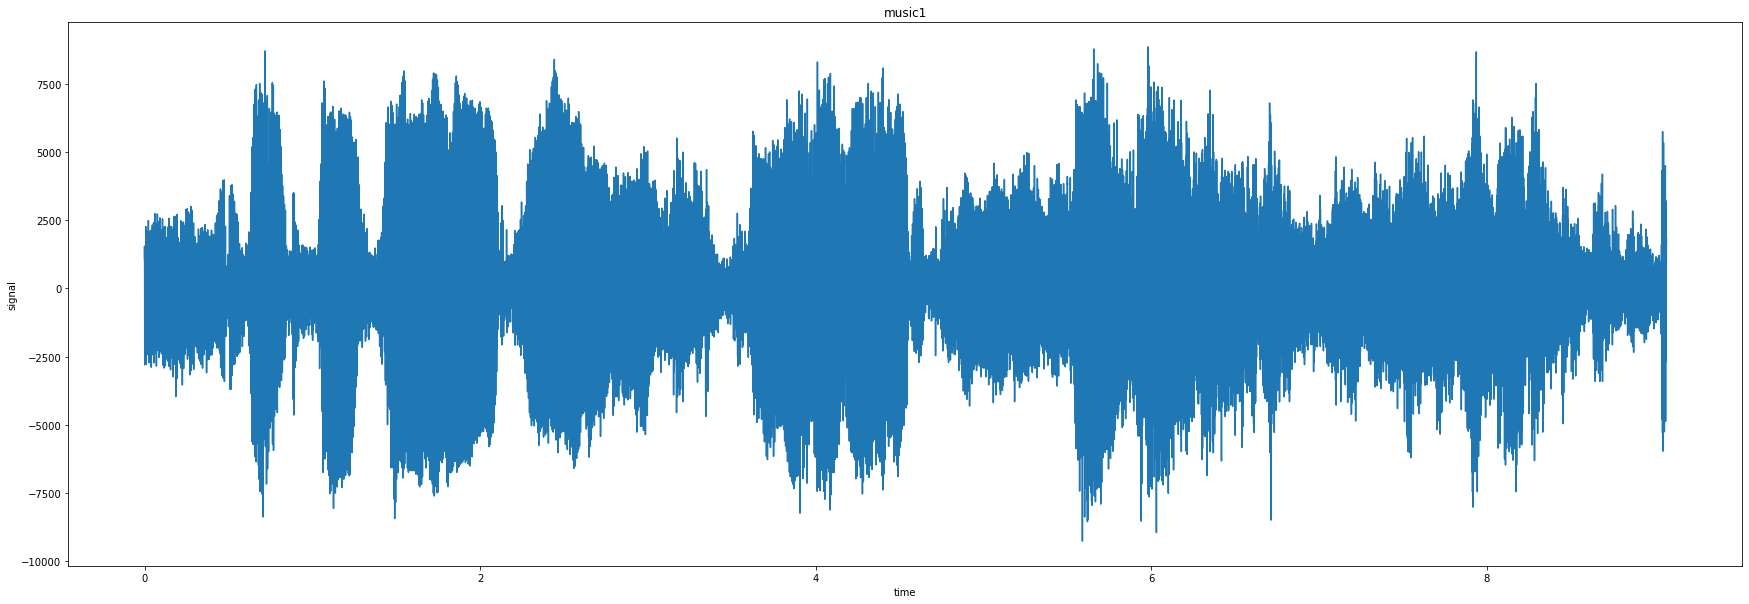

In [40]:
sample_rate1, data1 = wavfile.read('/Users/mac/Desktop/Signal_System-practical/music1.wav')
length1 = data1.shape[0]/sample_rate1
t1 = np.linspace(0, length1, data1.shape[0])
plot('time', 'signal', 'music1', t1, data1)

<div style="direction:rtl">
حال تابع fft که در واقع برداری را به‌عنوان ورودی می‌گیرد و تبدیل فوریه گسسته در زمان داده‌ی مورد نظر را به‌عنوان خروجی به ما می‌دهد را رسم می‌کنیم
</div>

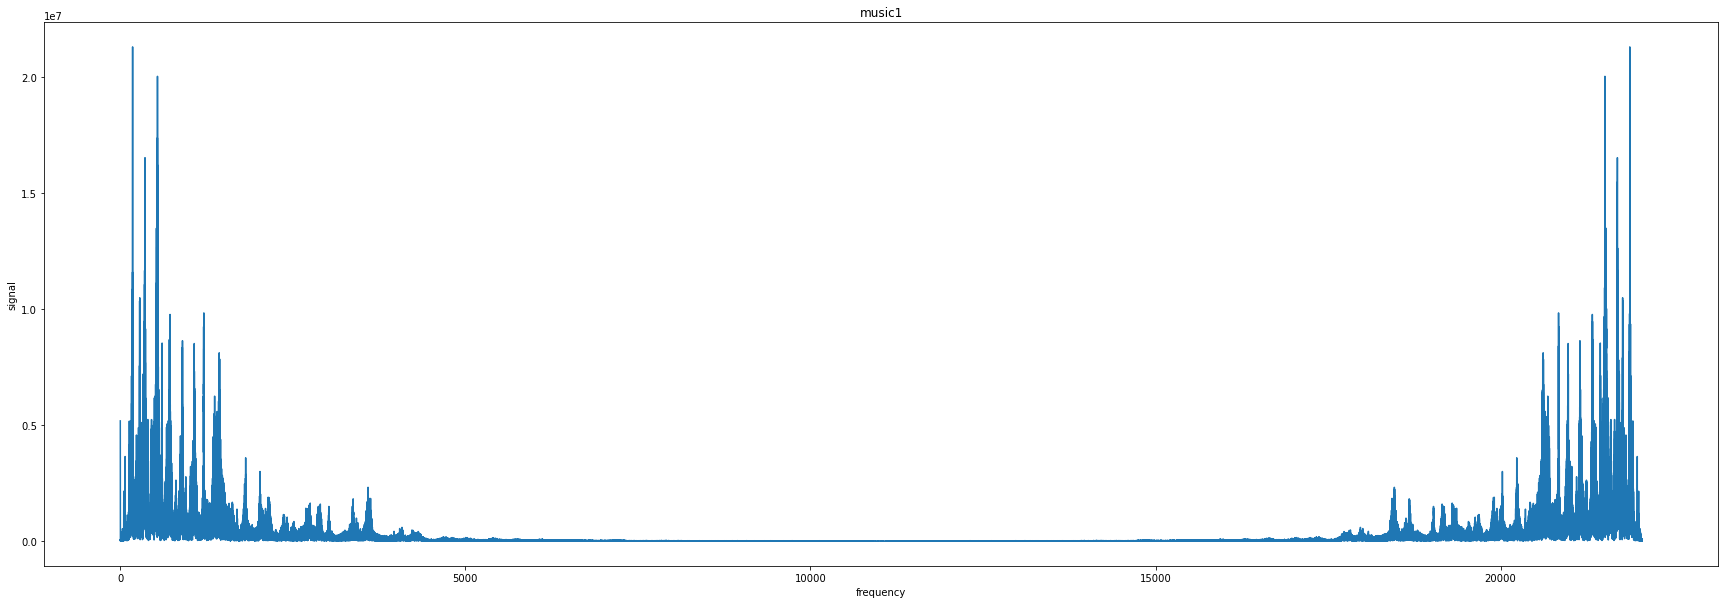

In [41]:
data1_DFT = np.fft.fft(data1)
f1 = np.linspace(0, sample_rate1, data1_DFT.shape[0])
plot('frequency', 'signal', 'music1', f1, np.abs(data1_DFT))

<div style="direction:rtl">
دوباره همه‌ی این مراحل را برای داده‌ی داده شده‌ی music2.wav انجام می‌دهیم و سیگنال تیدبل فوریه گسسته در زمان آنرا نیز رسم می‌کنیم
</div>

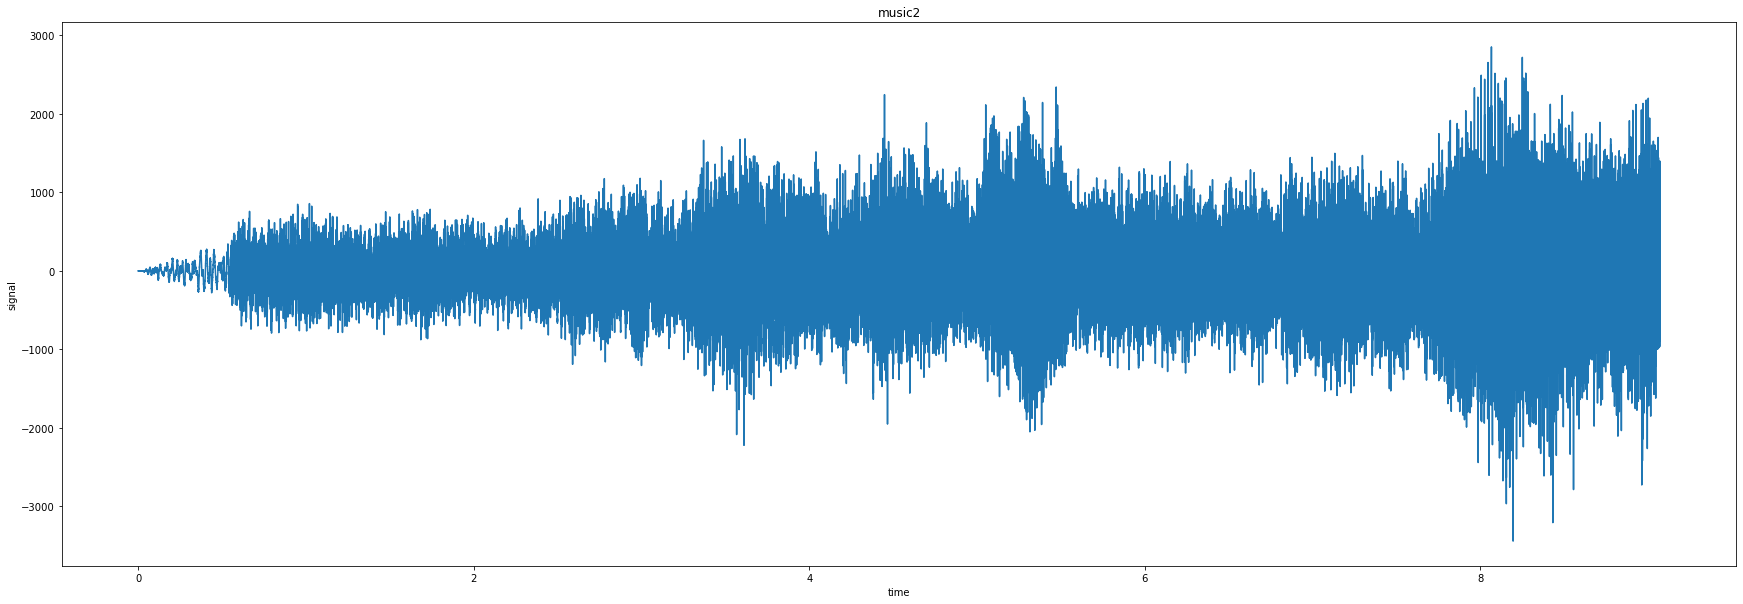

In [42]:
sample_rate2, data2 = wavfile.read('/Users/mac/Desktop/Signal_System-practical/music2.wav')
length2 = data2.shape[0]/sample_rate2
t2 = np.linspace(0, length2, data2.shape[0])
plot('time', 'signal', 'music2', t2, data2)

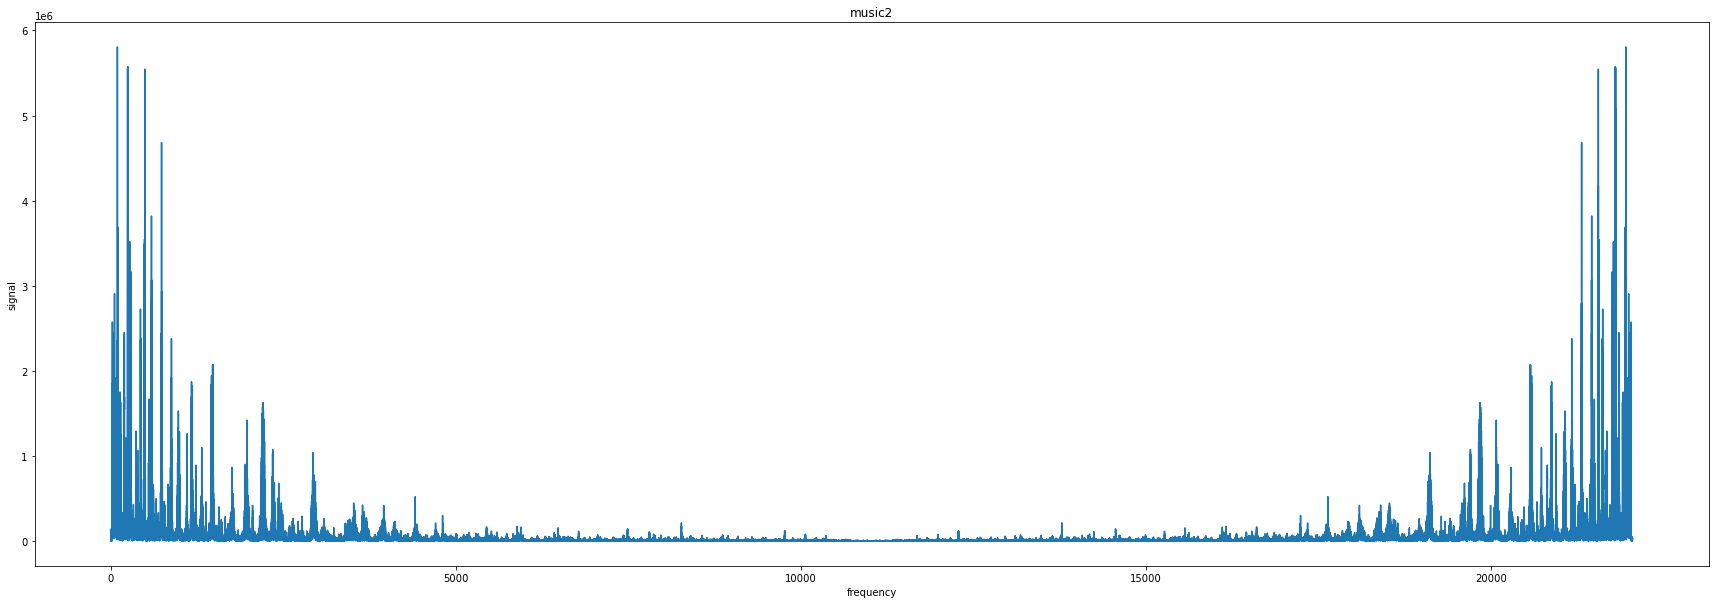

In [43]:
data2_DFT = np.fft.fft(data2)
f2 = np.linspace(0, sample_rate2, data2_DFT.shape[0])
plot('frequency', 'signal', 'music2', f2, np.abs(data2_DFT))

<div style="direction:rtl">
در ادامه تابع مربوط به fftshift را بر روی تبدیل فوریه اعمال کرده و معکوس آنرا نیز به‌دست می‌آوریم
</div>

In [44]:
shifted1 = fftshift(data1_DFT)
data1_shift = (ifft(shifted1))

<div style="direction:rtl">
در بخش آخر نیز اطلاعات فرکانسی music.1 را به‌کمک بلاک بالا شیفت فرکانسی می‌دهیم و حاصل را دوباره به حوزه‌ی زمان بر می‌گردانیم  
</div>

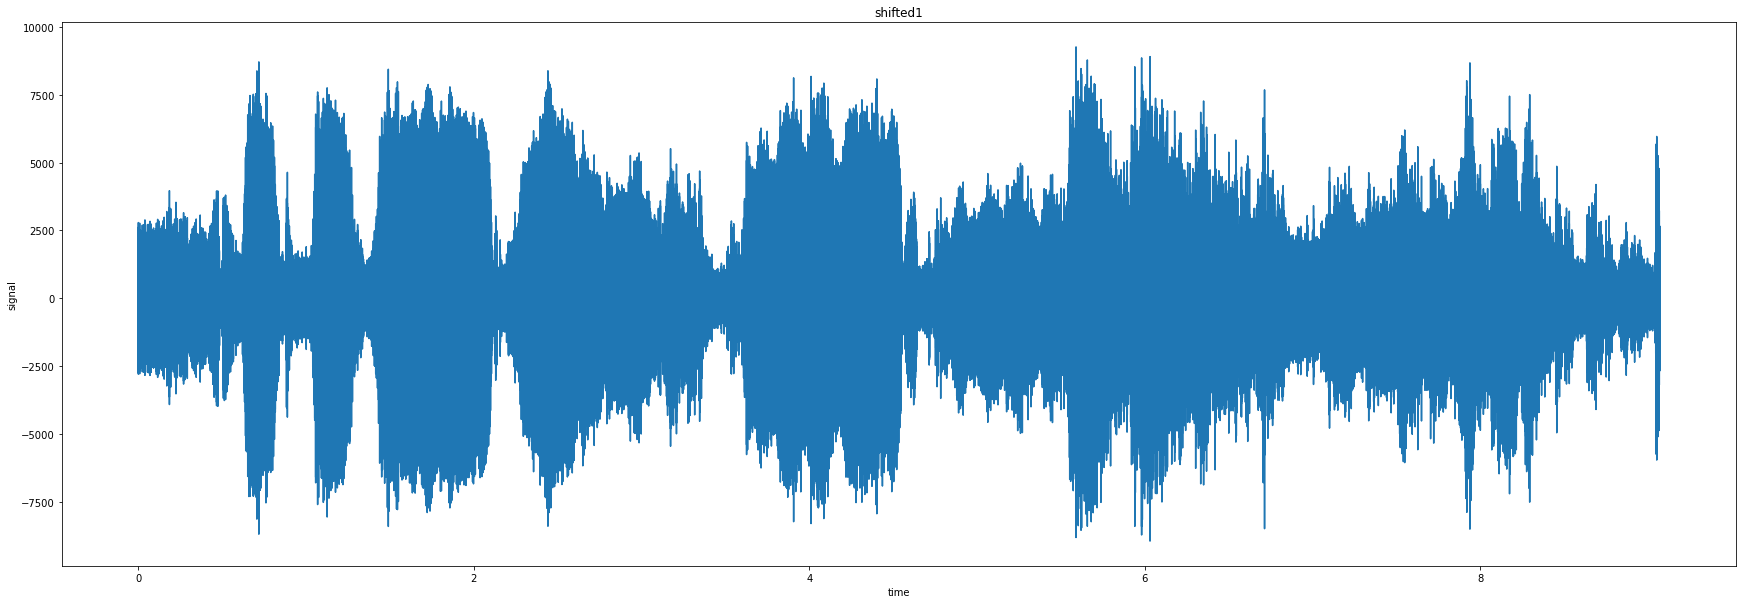

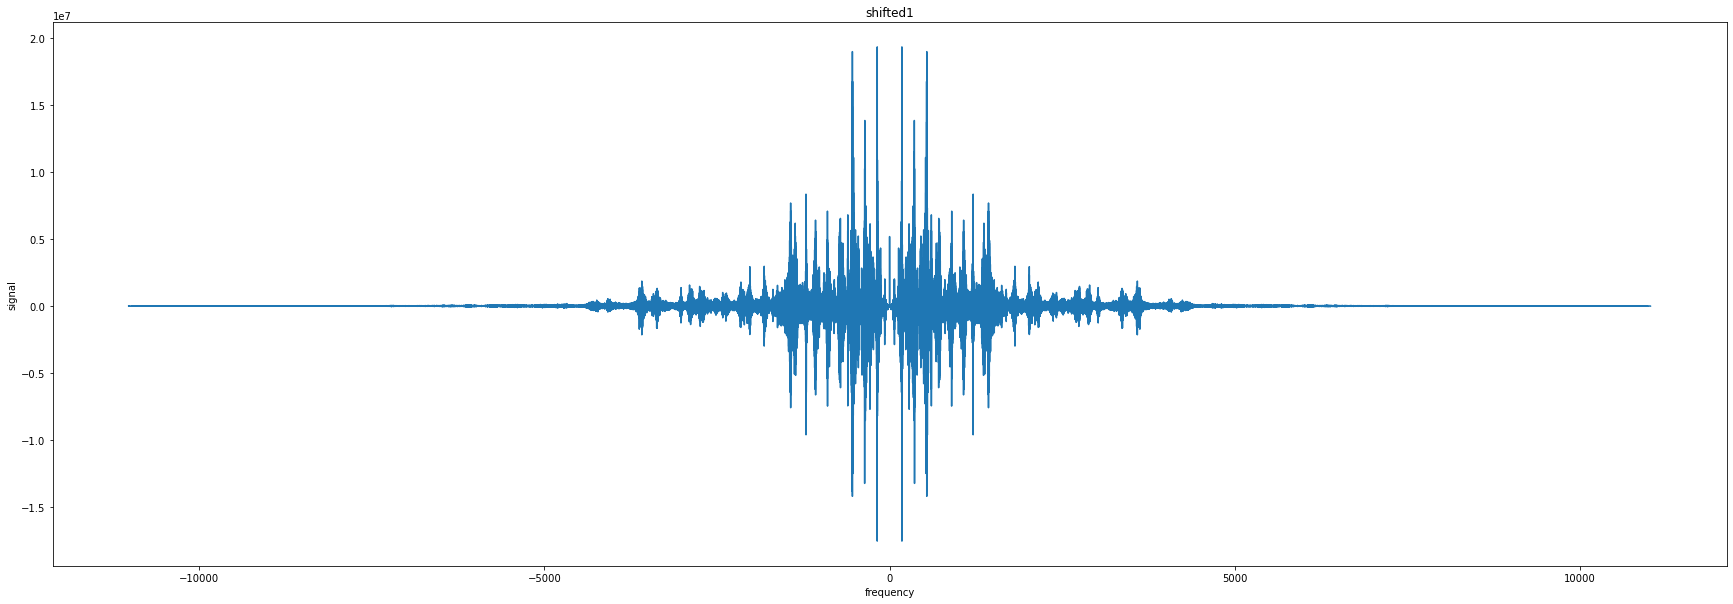

In [45]:
wavfile.write("/Users/mac/Desktop/Signal_System-practical/a)shifted1.wav", sample_rate1, shifted1.real)
f = np.linspace(-sample_rate1/2, sample_rate1/2, data1_shift.shape[0])

t1 = np.linspace(0, length1, data1.shape[0])
plot('time', 'signal', 'shifted1', t1, data1_shift)

t2 = np.linspace(0, length1, data1.shape[0])
plot('frequency', 'signal', 'shifted1', f, shifted1)

<div style="direction:rtl">
مشاهده می‌کنیم که در حالت اول قبل از شیفت پیدا کردن یک نیمه تبدیل فوریه در ابتدا و نیمه‌ی دیگری در انتها است. اما بعد از fftshift آن نیمه دوم به ابتدای نیمه اول اضافه شده است. به بیان دیگر، تابع 
    fftshift
    دو قسمت فرکانسی را هم مرکز کرده و به مرکز آرایه آورده است. توجه کنید که عملا به دلیل تقارن موجود در تبدیل فوریه سیگنال های صوتی نسبت به محور
   ($\omega =0$)
    اگر یک سمت محور را داشته باشیم، سمت دیگر را نیز خواهیم داشت. تابع 
    fft
    رایج کتابخانه‌ها این نیمه منفی را در انتهای آرایه قرار می‌دهد در حالی که در اصل تقارن حول 0 وجود داشته است و عملا تابع
    fftshift
    این تقارن مرکزی را ایجاد می‌کند ولی عملا اگر روی خروجی آن تبدیل معکوس بزنیم، از آن‌جایی که عموم داده‌های معنادار در مرکز نمودار هستند، عملا صدایی شنیده نمی‌شود. 
</div>

<div style="direction:rtl">
همچنین اگر به مقادیر زمانی این دو سیگنال نگاهی بیاندازیم، داریم:
</div>

In [46]:
print(data1)
print(data1_shift)

[1090 1548 1360 ... 1746 1856 1638]
[ 1090.+5.61158231e-15j -1548.+9.36162333e-13j  1360.-5.55073711e-13j ...
 -1746.+6.50295864e-13j  1856.-6.90555612e-13j -1638.+2.46284080e-13j]


<div style="direction:rtl">
فارغ از وجود عوامل مختلط در دومی که عملا بسیار کوچک هستند و اثرگذار نیستند، نکته قابل توجه این است که مقادیر در حالت شیفت‌یافته، یکی در میان مثبت و منفی هستند. در اصل هم محور کردن فرکانس‌ها حول صفر باعث این موضوع شده است. این موضوع در شکل خیلی واضح نیست چون عملا سرعت نوسان ها را بالا برده است. در حالی که در فرمت داده شده، انتظار شکل دیگری از داده‌ها را داریم. این موضوع عملا باعث می‌شود که صدایی پخش نشود. 
</div>

<font face="Times" size=5>
b)
</font>

<div style="direction:rtl">
در این قسمت مقدارshifted.1 تبدیل فوریه گسسته در زمان را با مقدار تبدیل فوریه data2  جمع می‌کنیم و حاصل را به‌دست می‌آوریم و نمودار آنرا نیز رسم می‌کنیم
که در واقع به این معنی است که اطلاعات فرکانسی شیفت یافته برای فایل music.1 همان shifted.1 است و اطلاعات فرکانسی آن نیز همان data2_DFT است که در قسمت قبل حساب شد و حاصل جمع آنها در سیگنال نهایی added_DFT در حوزه‌ی زمان محاسبه و رسم شده است. 
</div>

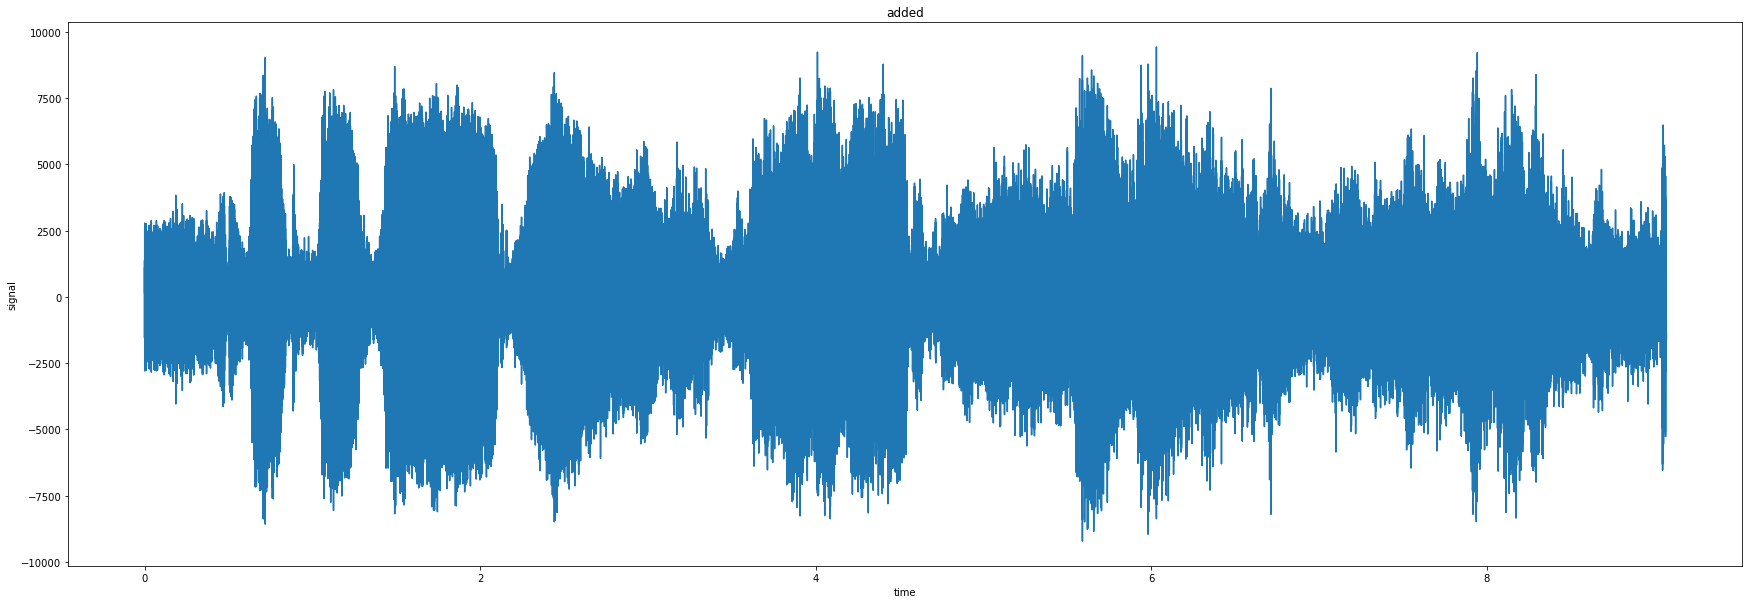

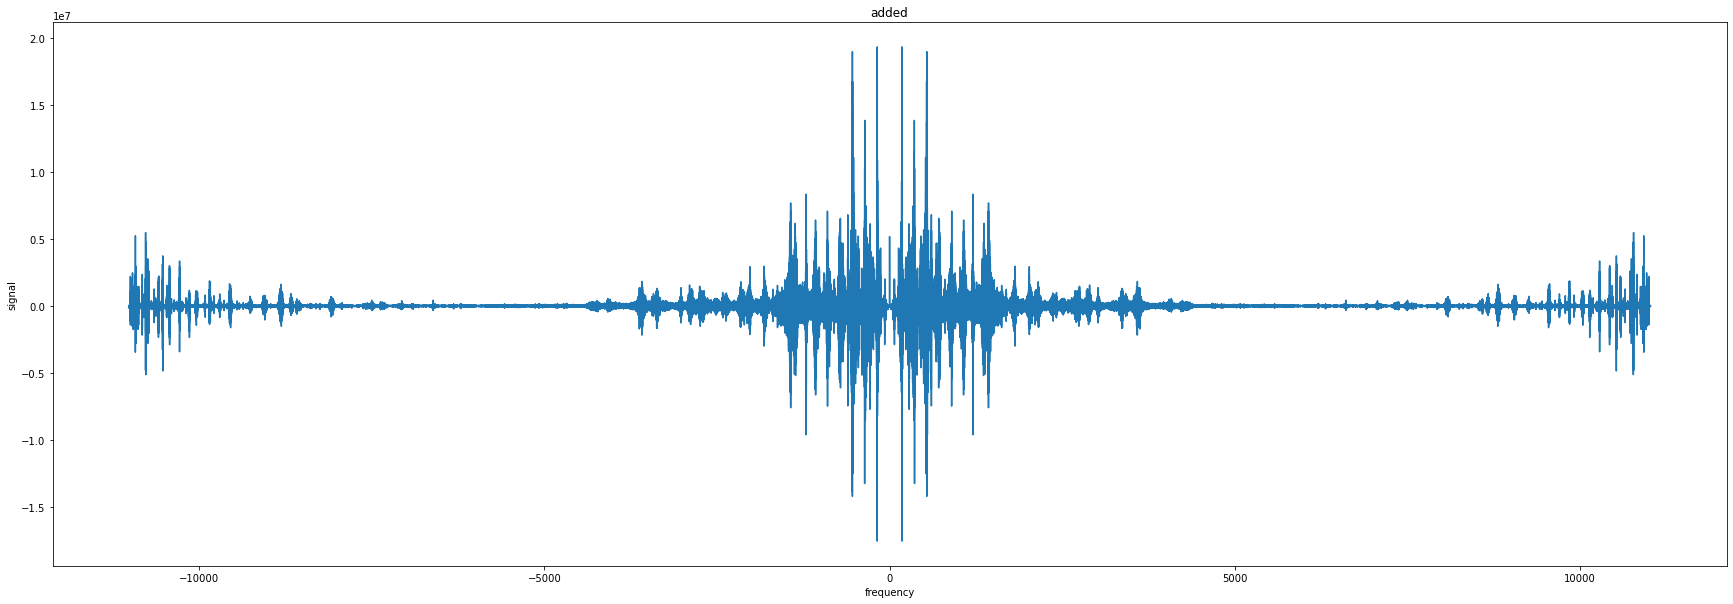

In [47]:
added_DFT = shifted1 + data2_DFT
added = np.fft.ifft(added_DFT)
wavfile.write("/Users/mac/Desktop/Signal_System-practical/b)added.wav", sample_rate1, added.real)
plot('time', 'signal', 'added', t1, added.real)
plot('frequency', 'signal', 'added', f, added_DFT)

<div style="direction:rtl">
به وضوح بعد از پخش  added.wav که فایل نهایی پاسخ این قسمت است، صدای music2 بیشتر و واضح تر شنیده می‌شود 
<br/>
عملا موسیقی اول با توجه به شیفتی که پیدا کرده و بالا هم مشاهده کردیم پخش نمی‌شود ولی موسیقی دوم به همان شکلی که بوده دوباره بازیابی می‌شود و پخش می‌شود
</div>

<font face="Times" size=5>
c)
</font>

<div style="direction:rtl">
در این مرحله نیز سیگنال نهایی مرحله قبل را شیفت فرکانسی می‌دهیم و به حوزه زمان بر می‌گردانیم که با نام shifted_added.wav آنرا می‌نویسیم و پخش می‌کنیم 
</div>

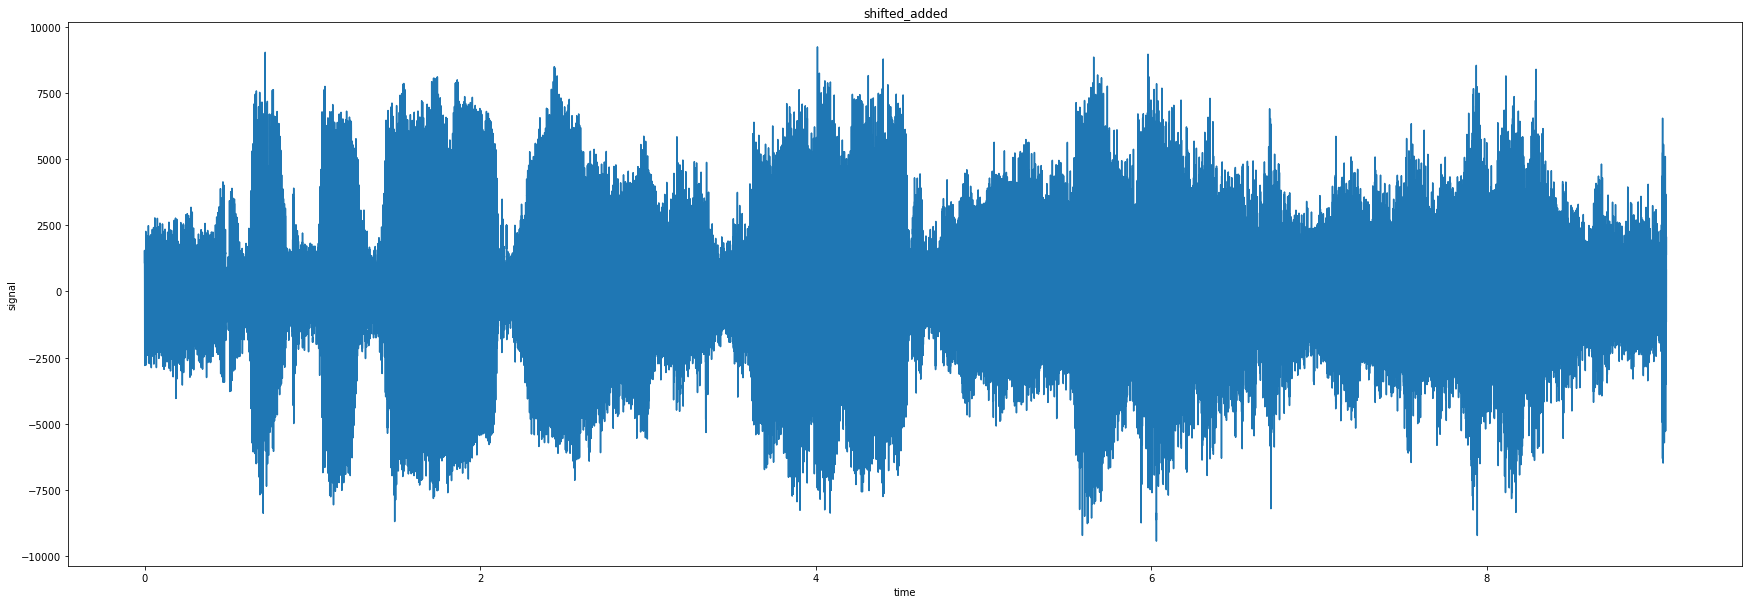

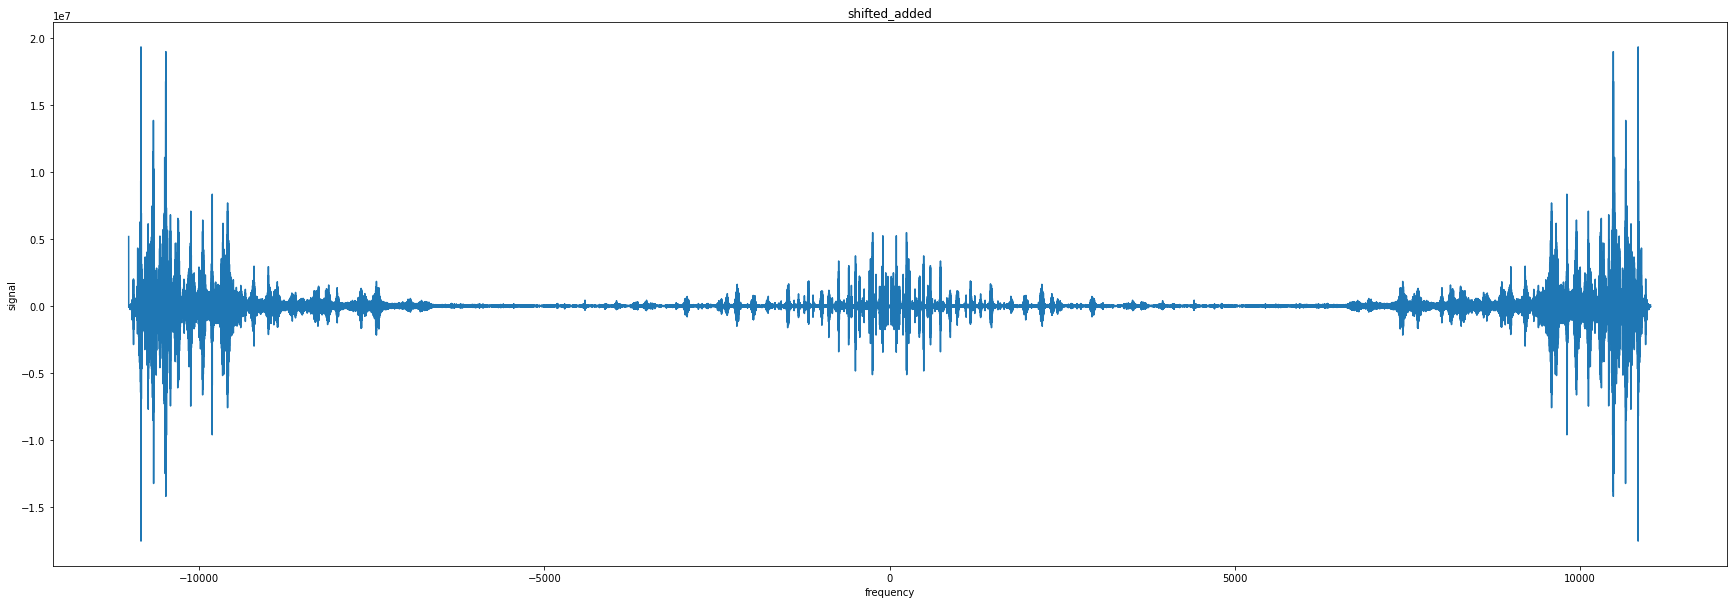

In [48]:
shifted_added_DFT = np.fft.fftshift(added_DFT)
shifted_added = np.fft.ifft(shifted_added_DFT)
wavfile.write("/Users/mac/Desktop/Signal_System-practical/c)shifted_added.wav", sample_rate1, shifted_added.real)
plot('time', 'signal', 'shifted_added', t1, shifted_added.real)
plot('frequency', 'signal', 'shifted_added', f, shifted_added_DFT)

<div style="direction:rtl">
در این قسمت فایل music.1 بسیار واضح تر و رساتر پخش و شنیده می‌شود. در اصل با شیفت فرکانسی دوم، موسیقی اول به همان حالت اول خود در می‌آید. (چون عملا بار دیگر نیمه دوم به ابتدای نیمه اول اضافه می‌شود و دو بار تکرار این عملا معادل این است که هیچ تغییری ایجاد نکنیم) ولی موسیقی دوم یک بار شیفت فرکانسی خورده و مانند وضعیتی می‌شود که در بخش قبل برای موسیقی اول پیش آمده بود. در نتیجه در این قسمت موسیقی اول پخش می‌شود. دلیل این که می‌توانیم این دو را عملا مستقل از هم بررسی کنیم؛ خطی بودن تبدیل فوریه در حوزه فرکانس است. عملا یعنی این شیفت فرکانسی دوم، باعث شده که موسیقی دوم شیفت فرکانسی داشته باشد و موسیقی اول هم که در این سیگنال قبلا شیفت فرکانسی خورده بود، با شیفت فرکانسی دوم برقرار شود.
</div>

<font face="Times" size=5>
Question2
</font>

<font face="Times" size=4>
1)
</font>

<div style="direction:rtl">
در این قسمت معکوس تبدیل فوریه گسسته در زمان تابع داده شده را به‌دست می‌آوریم
</div>

$$
x_{n} = \frac{1}{N} \sum_{k=0}^{N-1} X_{k}\;  .\;  e^{i\frac{ 2\pi}{N}k n}
$$

<font face="Times" size=4>
2)
</font>

<div style="direction:rtl">
در این قسمت نیز کد پایتون پیاده‌سازی fft که برداری را به‌عنوان ورودی می‌گیرد و بردار تبدیل فوریه گسسته در زمان آنرا به‌عنوان خروجی به ما می‌دهد، نوشته شده است
</div>

In [49]:
def fft(x):
    N = len(x)
    half_N = N // 2
    X = np.zeros(N, dtype=complex)

    if N == 1:
        X[0] = x[0]
    else:
        x_even = x[0::2] 
        x_odd = x[1::2]  
        X_even = fft(x_even)
        X_odd = fft(x_odd)
        for m in range(N):
            X[m] = X_even[m % half_N] + X_odd[m % half_N] * cmath.exp(-1j*2*math.pi*m/N)

    return X

<font face="Times" size=4>
3)
</font>

<div style="direction:rtl">
در این قسمت نیز پیاده‌سازی تابع معکوس تبدیل فوریه تابع داده شده را انجام دادیم که با اسم ifft نیز شناخته می‌شود 
</div>

In [50]:
def ifft(X):
    N = len(X)
    half_N = N // 2
    x = np.zeros(N, dtype=complex)

    if N == 1:
        x[0] = X[0]
    else:
        X_even = X[0::2]
        X_odd = X[1::2]
        x_even = ifft(X_even)
        x_odd = ifft(X_odd)
        for n in range(N):
            x[n] = x_even[n % half_N] + x_odd[n % half_N] * cmath.exp(1j*2*math.pi*n/N)

    return x

<font face="Times" size=4>
4)
</font>

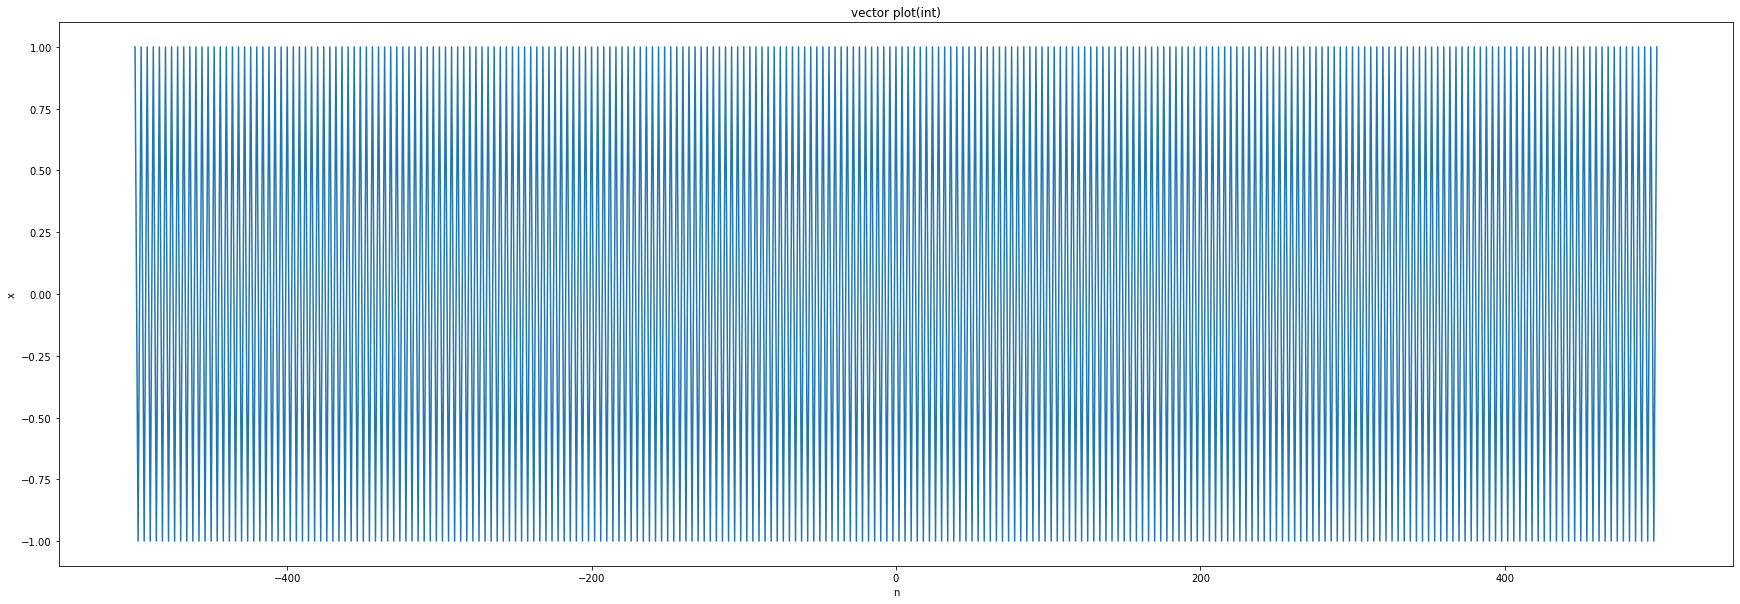

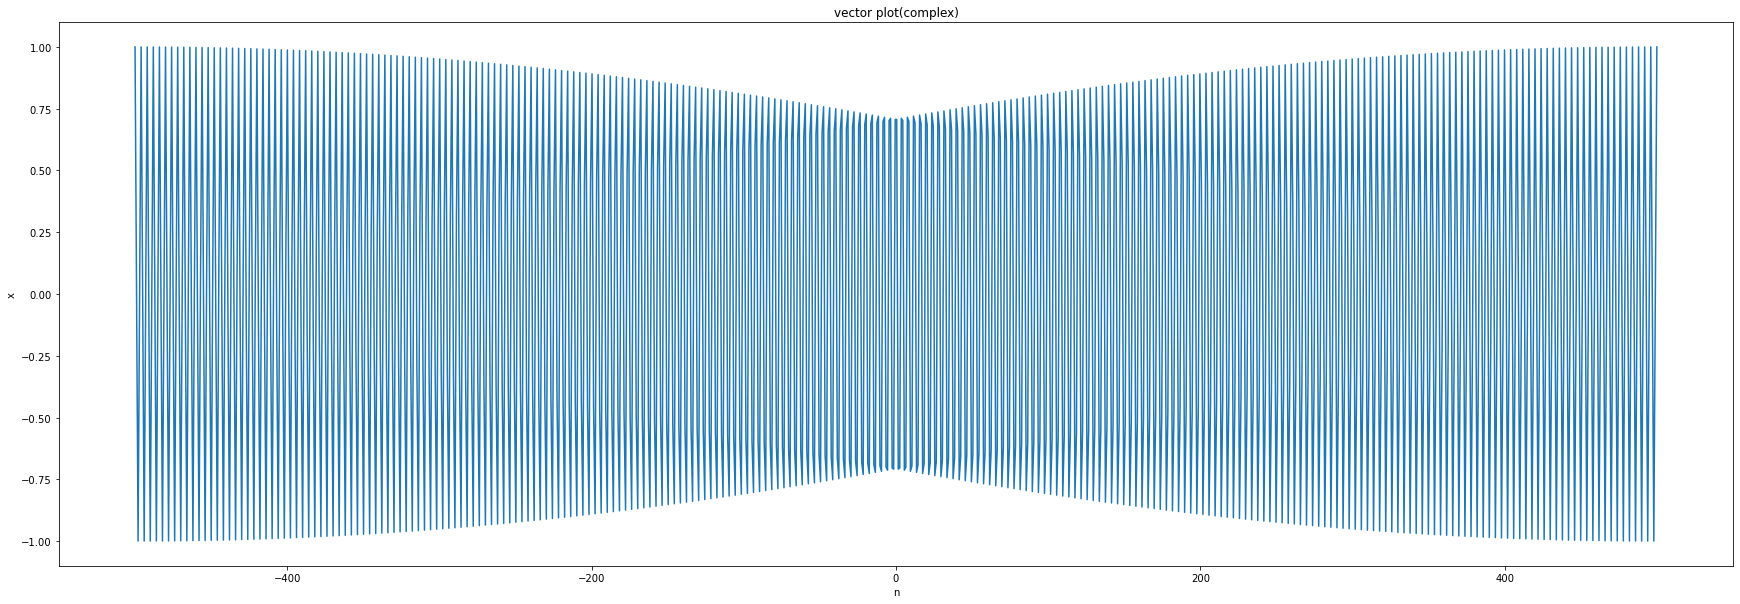

In [51]:
n_int = np.linspace(-500, 500, 1000, dtype=int)
n_complex = np.linspace(-500, 500, 1000, dtype=complex)
x_int = np.cos(np.pi * n_int * 1/2)
x_complex = np.cos(np.pi * n_complex * 1/2)
plot('n','x', 'vector plot(int)', n_int, x_int)
plot('n','x', 'vector plot(complex)', n_complex, x_complex)

<font face="Times" size=4>
5)
</font>

<div style="direction:rtl">
در این قسممت تبدیل فوریه $x_{t}$ را حساب می‌کنیم
</div>

$$
x(t) \leftrightarrow  \pi [\delta (\omega - \pi) + \delta (\omega + \pi)]
$$

<font face="Times" size=4>
6)
</font>

<div style="direction:rtl">
با اعمال تابع پیاده‌سازی شده در قسمت دوم این سوال و استفاده از آن در این قسمت می‌توانیم fft تبدیل فوریه x را به‌دست آوریم
</div>

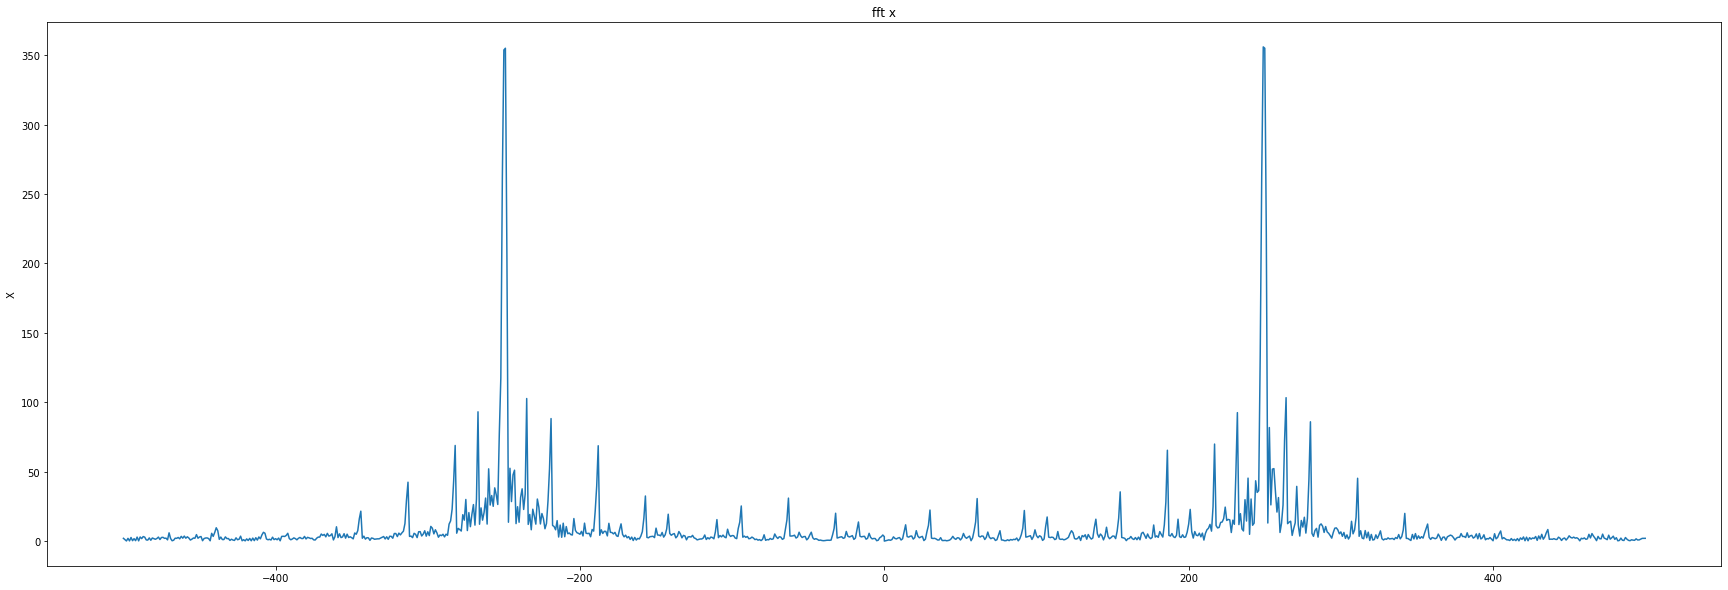

In [52]:
fourier_x = fft(x_int)
plot('', 'X', 'fft x', n_int, np.abs(fourier_x))

<font face="Times" size=4>
7)
</font>

<div style="direction:rtl">
برای ifft این تابع و بررسی برابر بودن و یا نبودن مقدار X[k] با x[n] نیز داریم
</div>

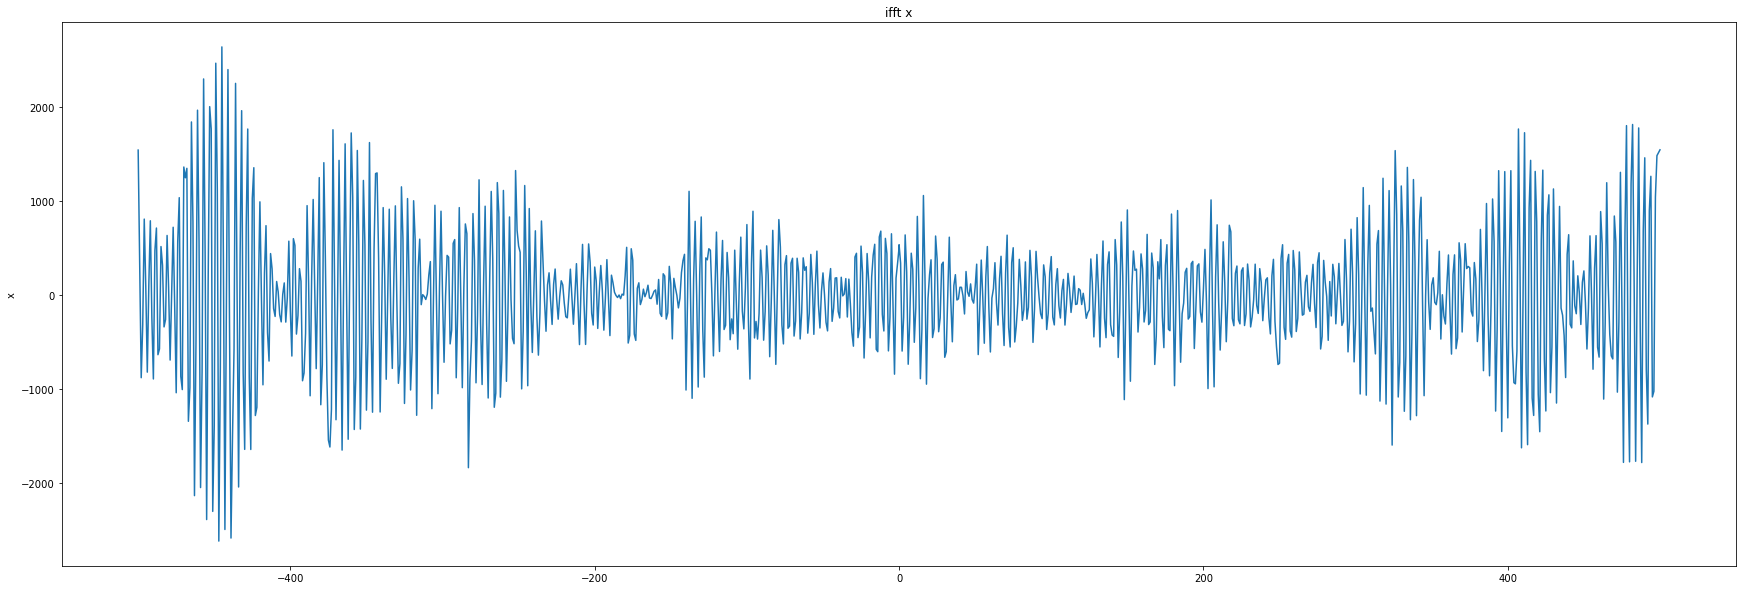

equal with x[n]: False


In [53]:
inverse_fourier_x = ifft(fourier_x)
plot('', 'x', 'ifft x', n_int, inverse_fourier_x.real)
print(f'equal with x[n]: {(np.abs(inverse_fourier_x) == x_int)[0]}')

<font face="Times" size=4>
8)
</font>

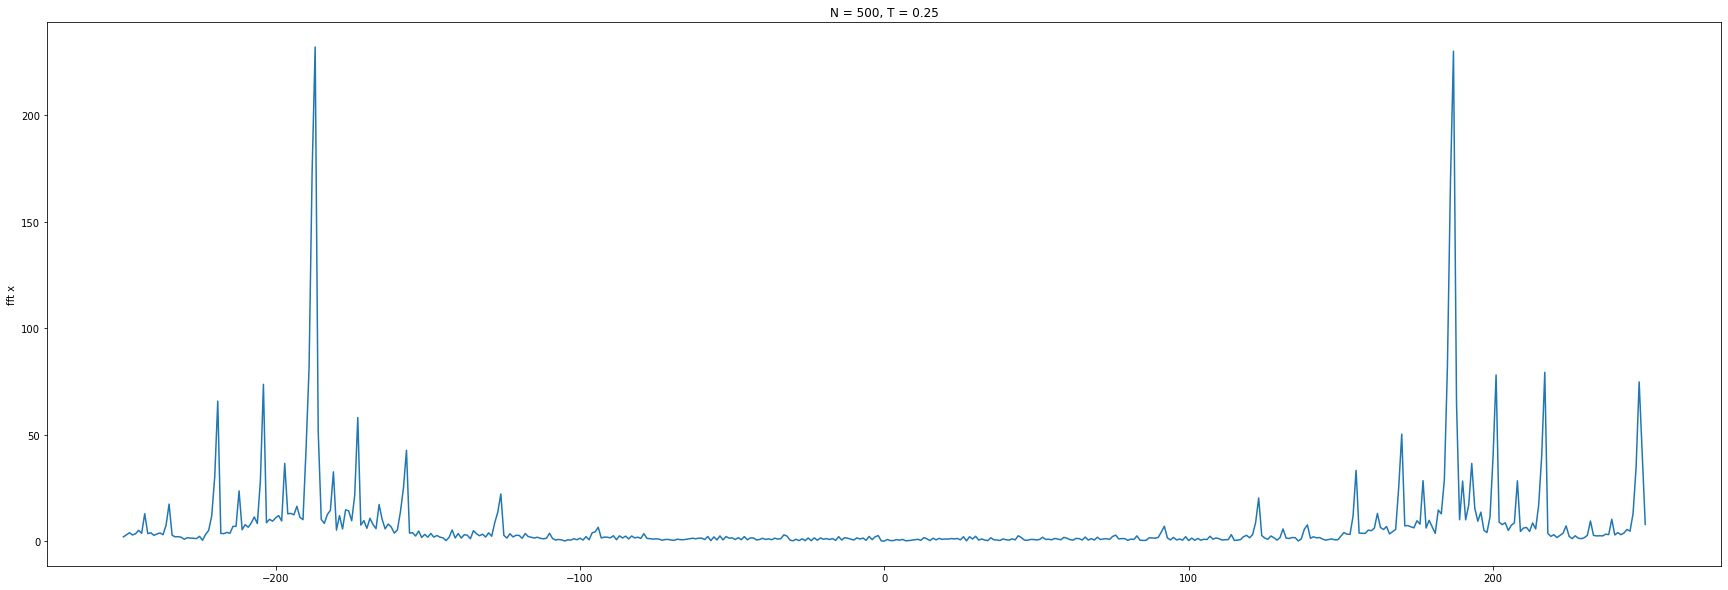

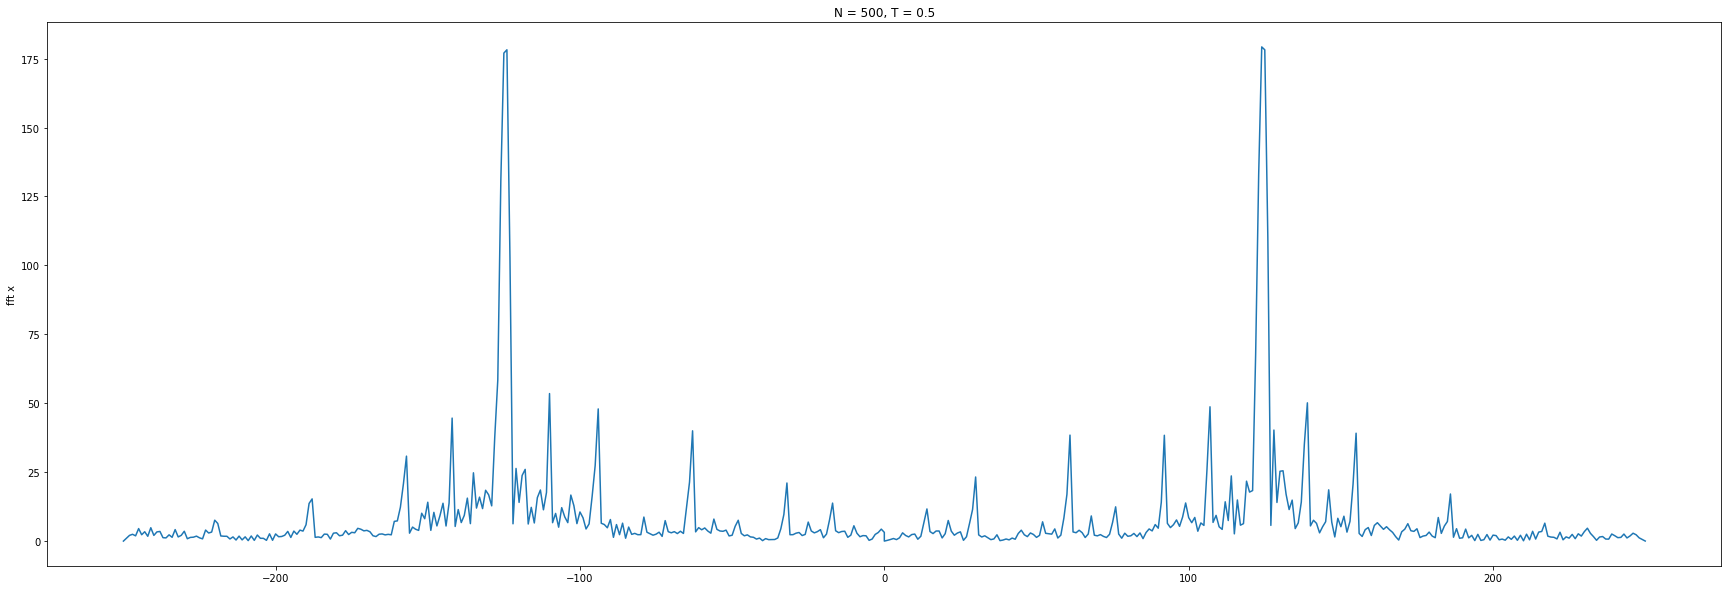

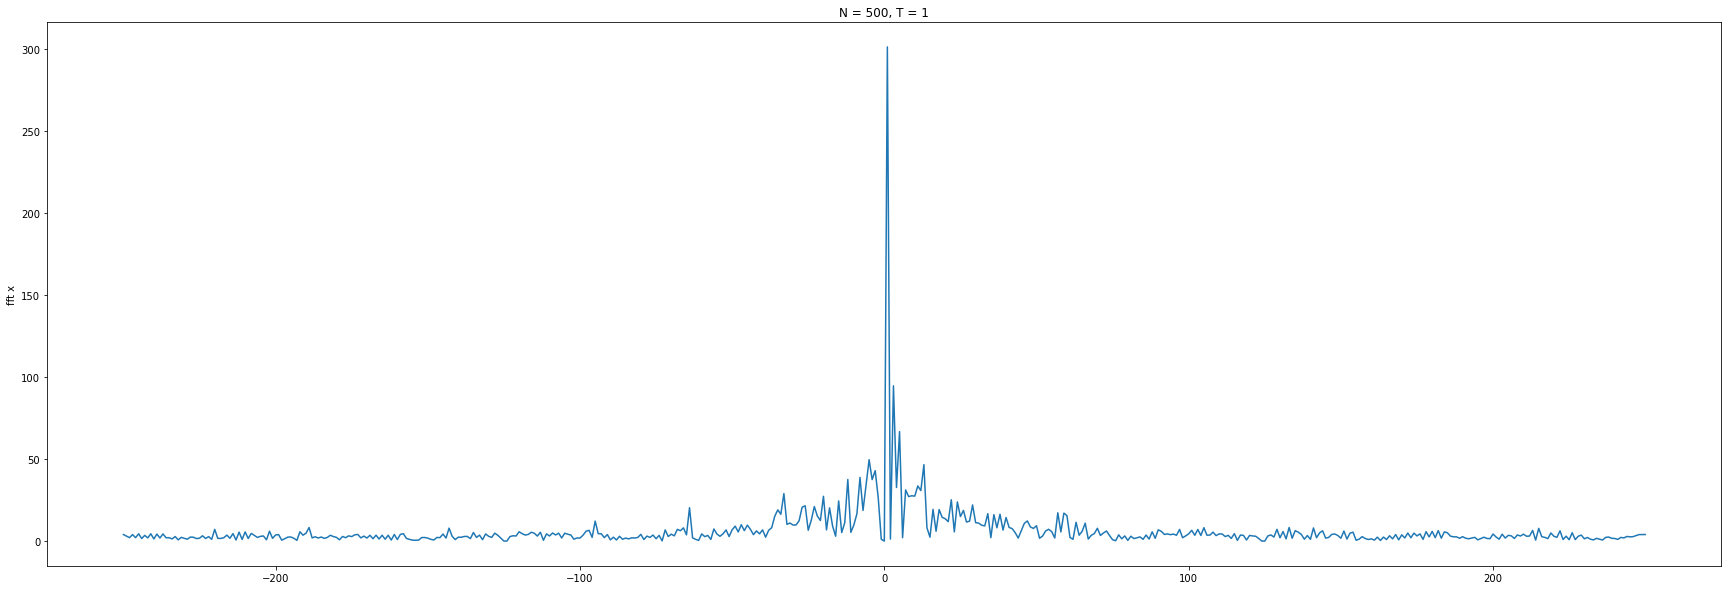

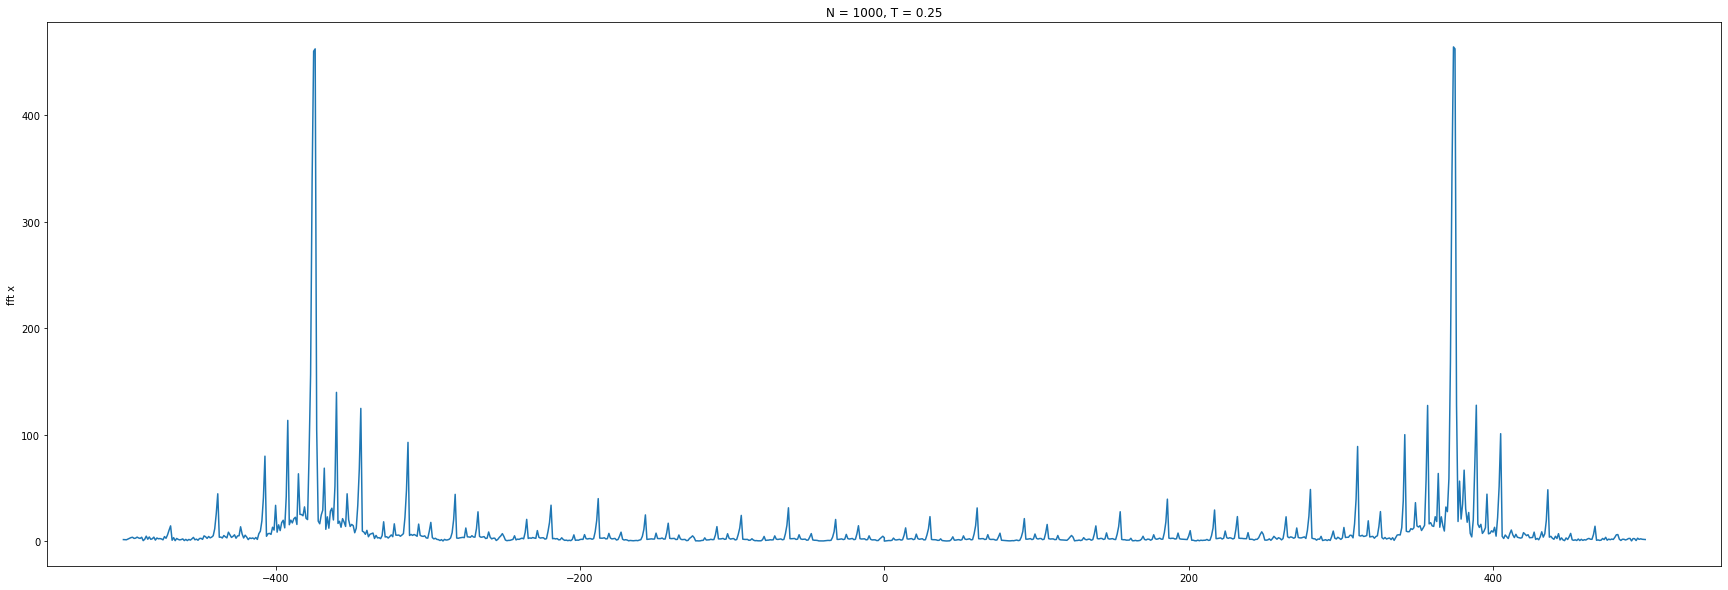

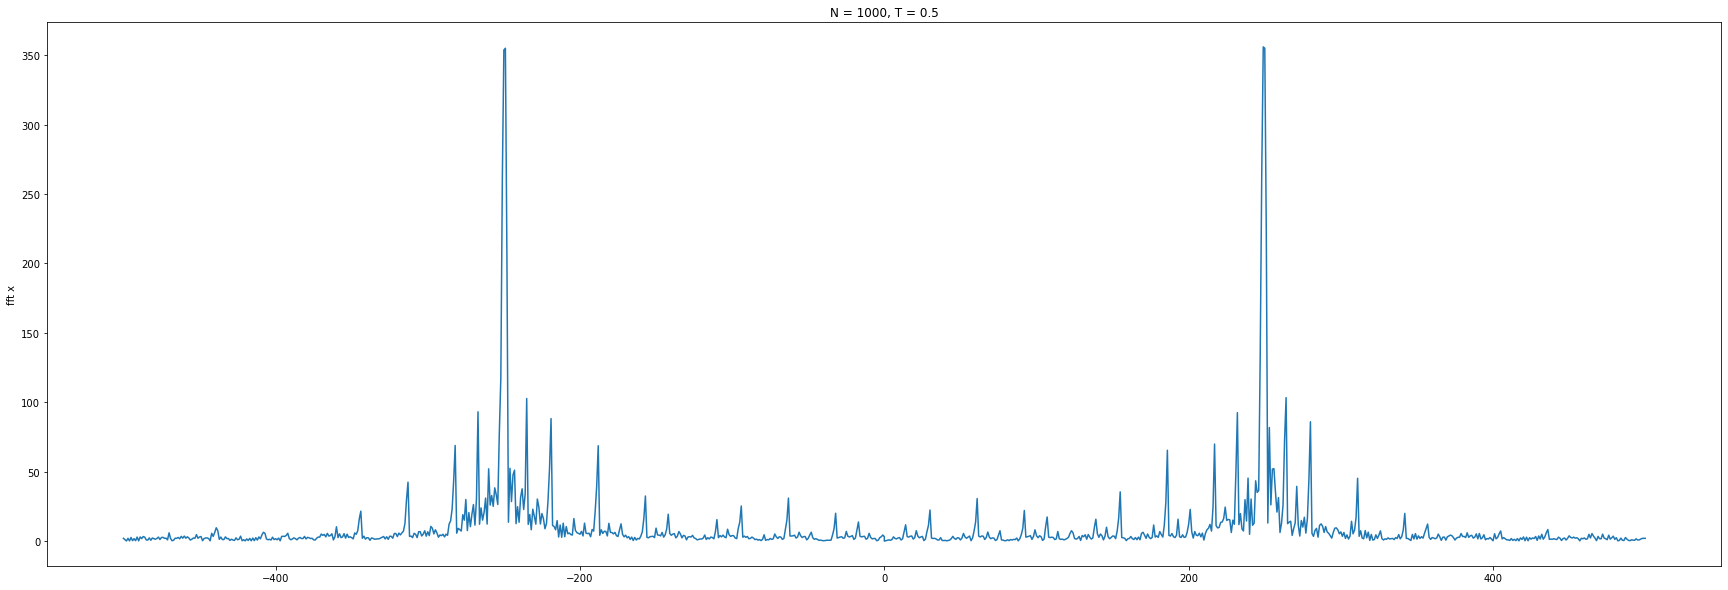

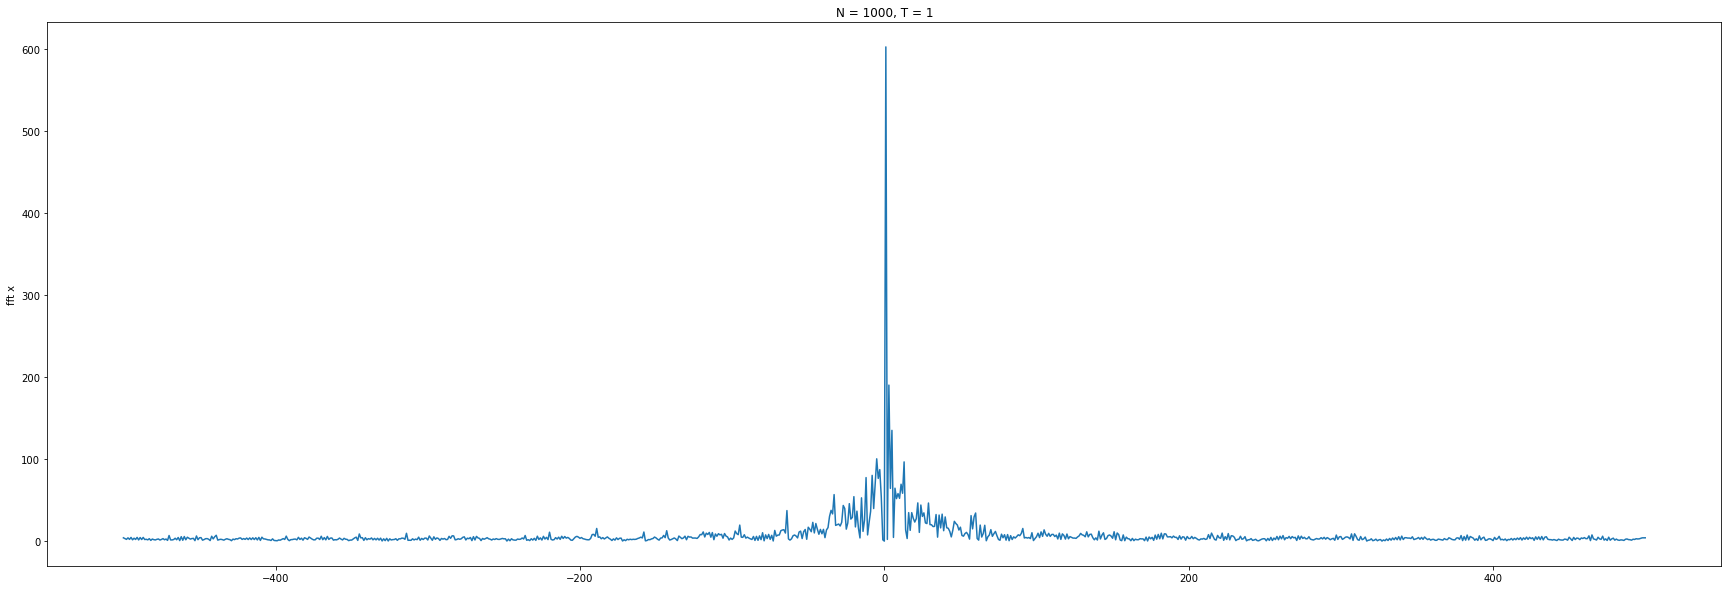

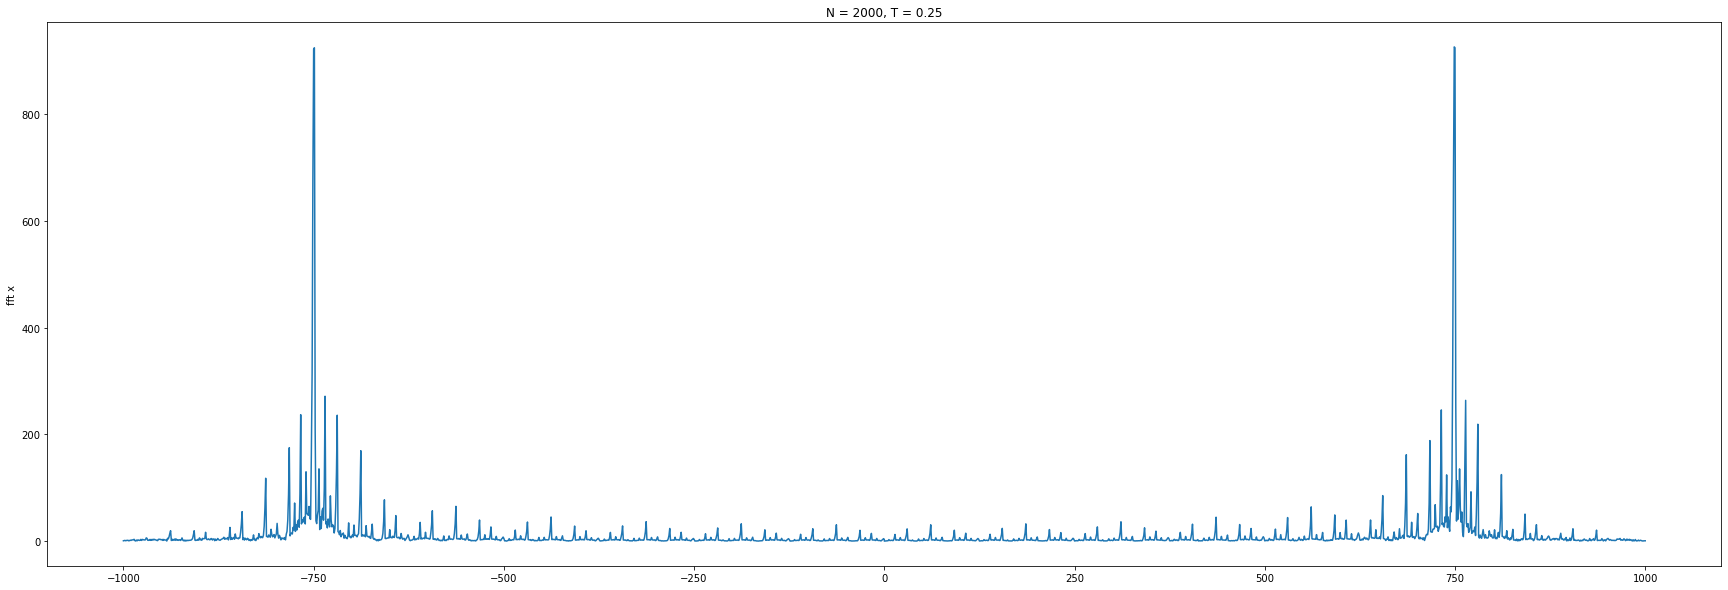

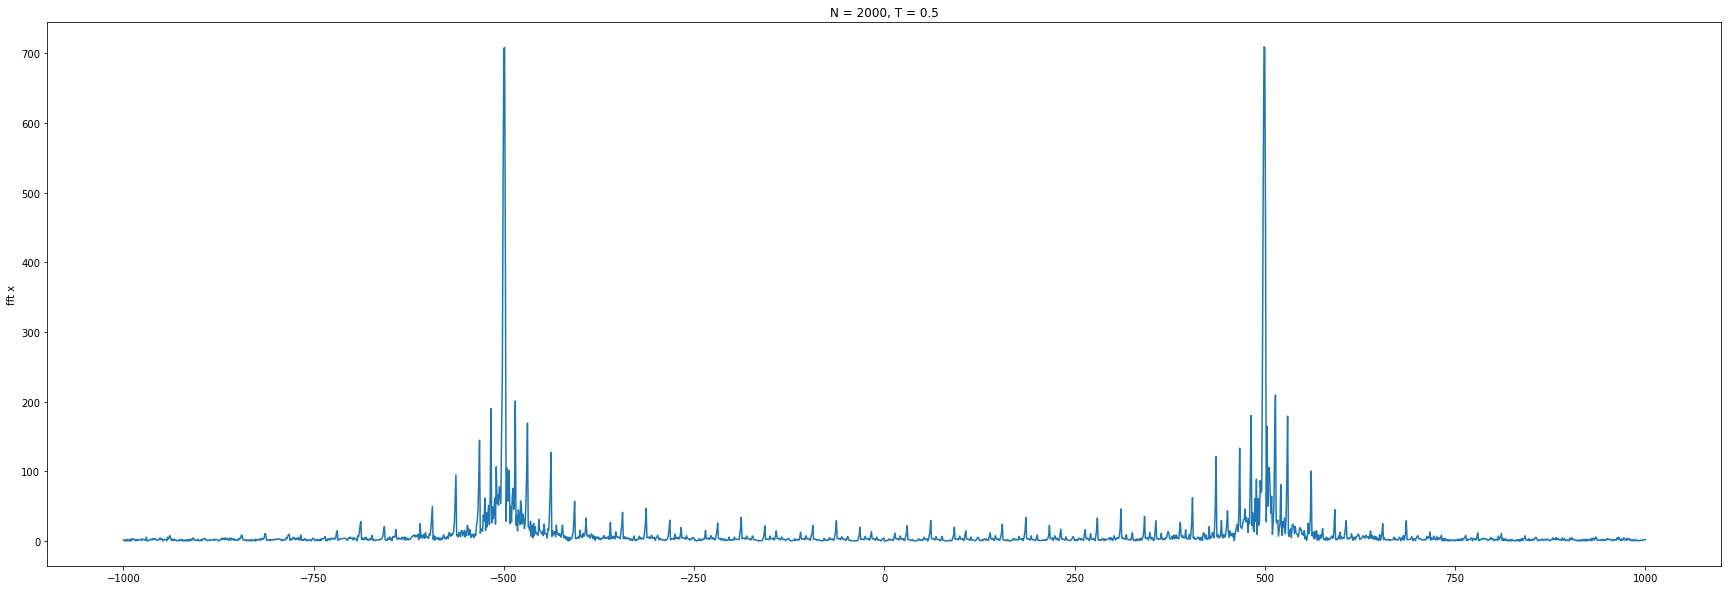

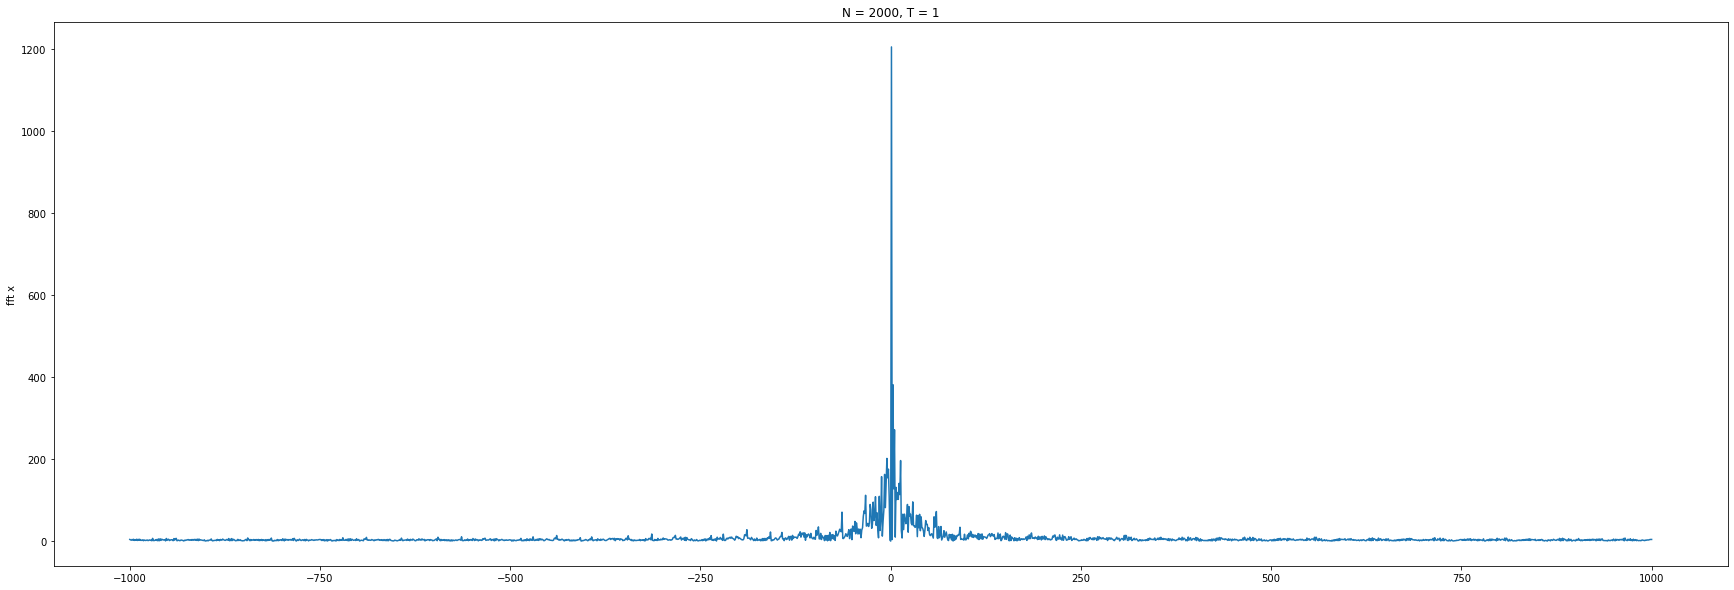

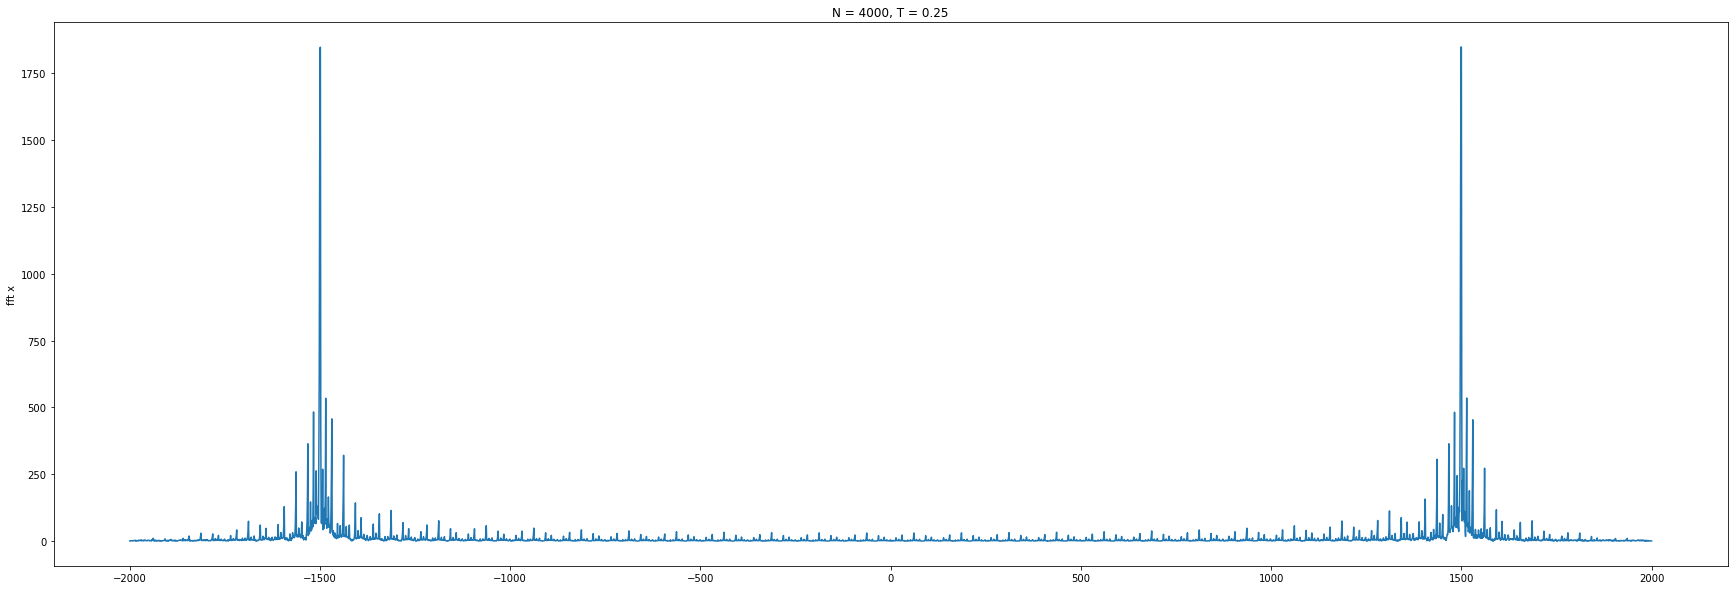

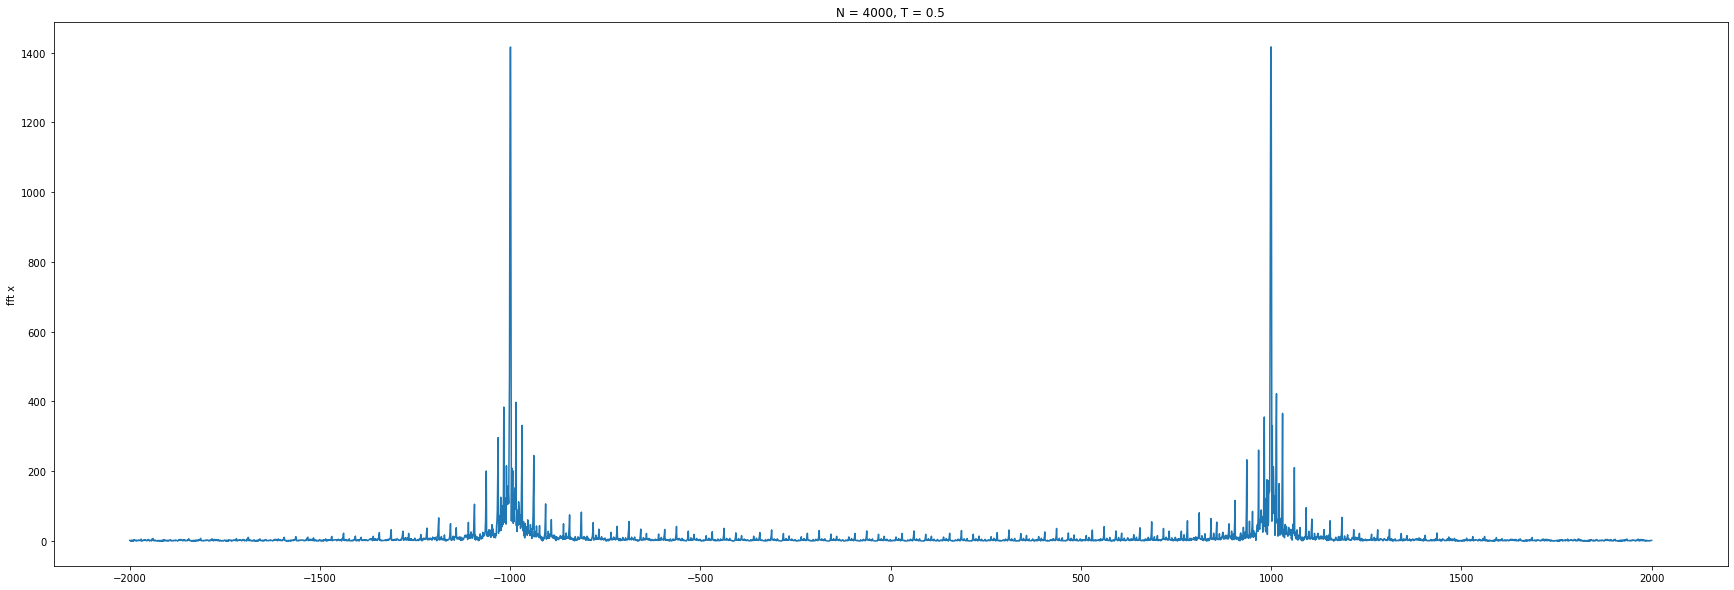

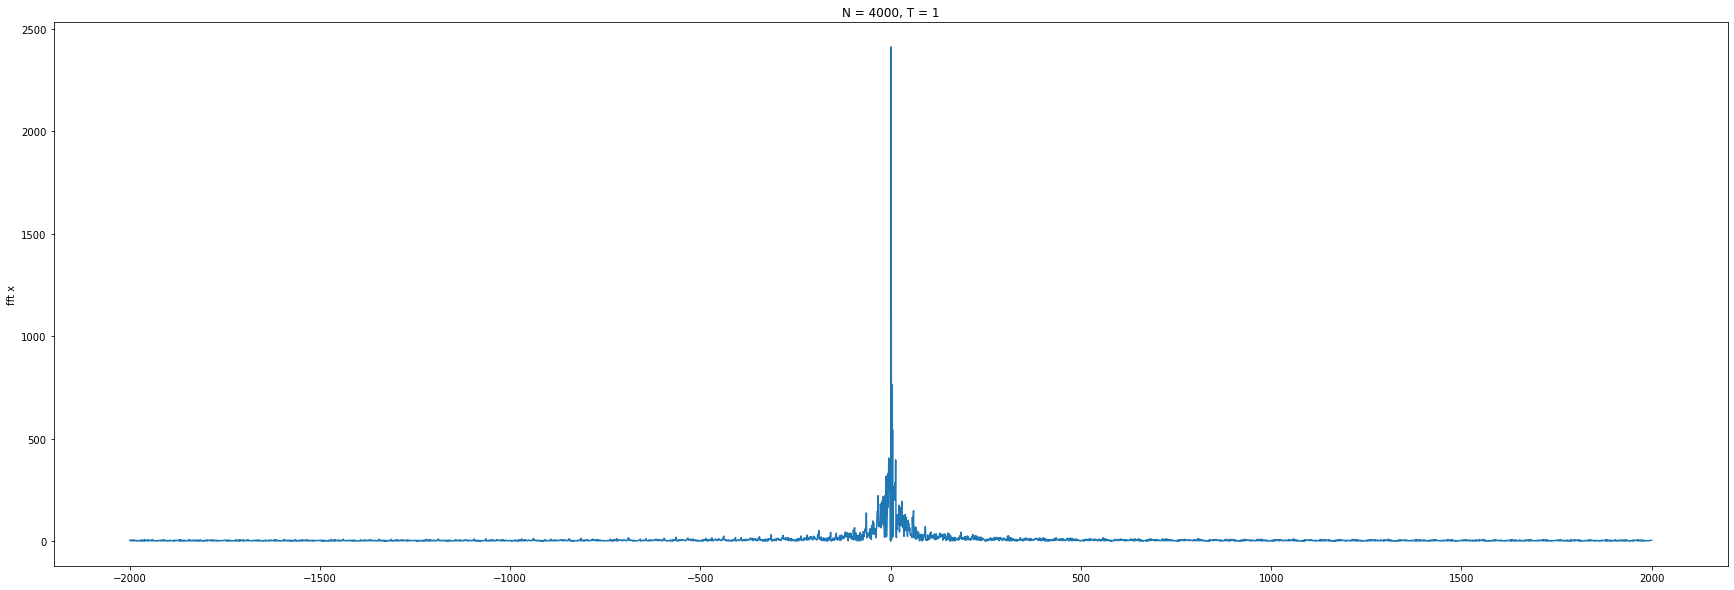

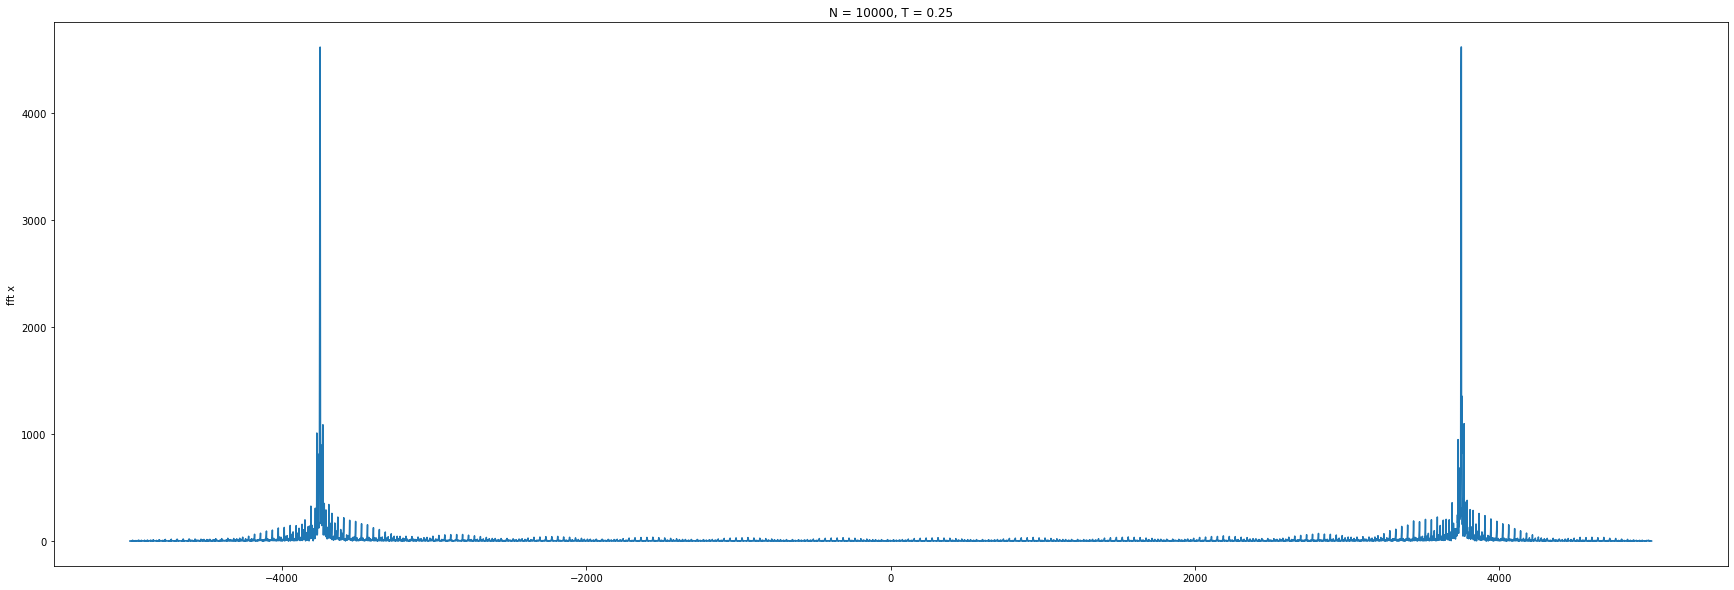

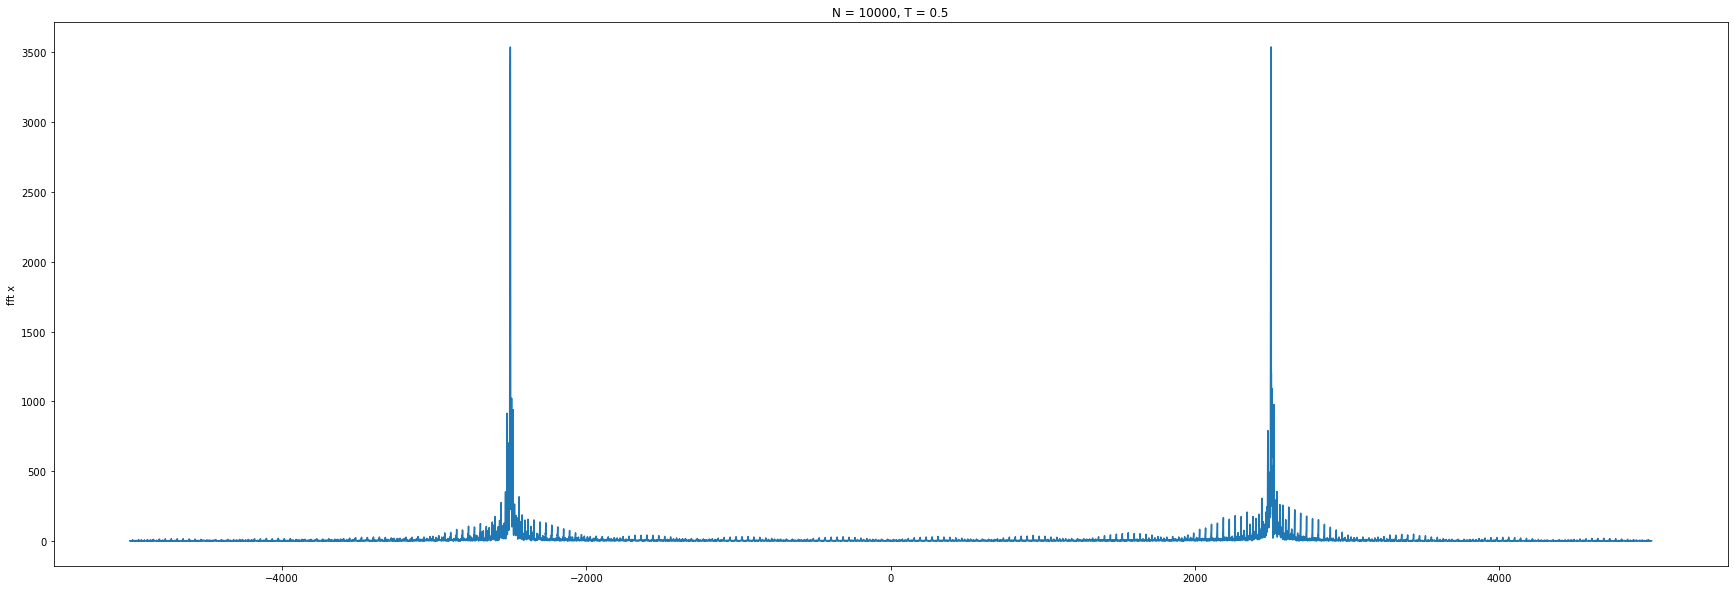

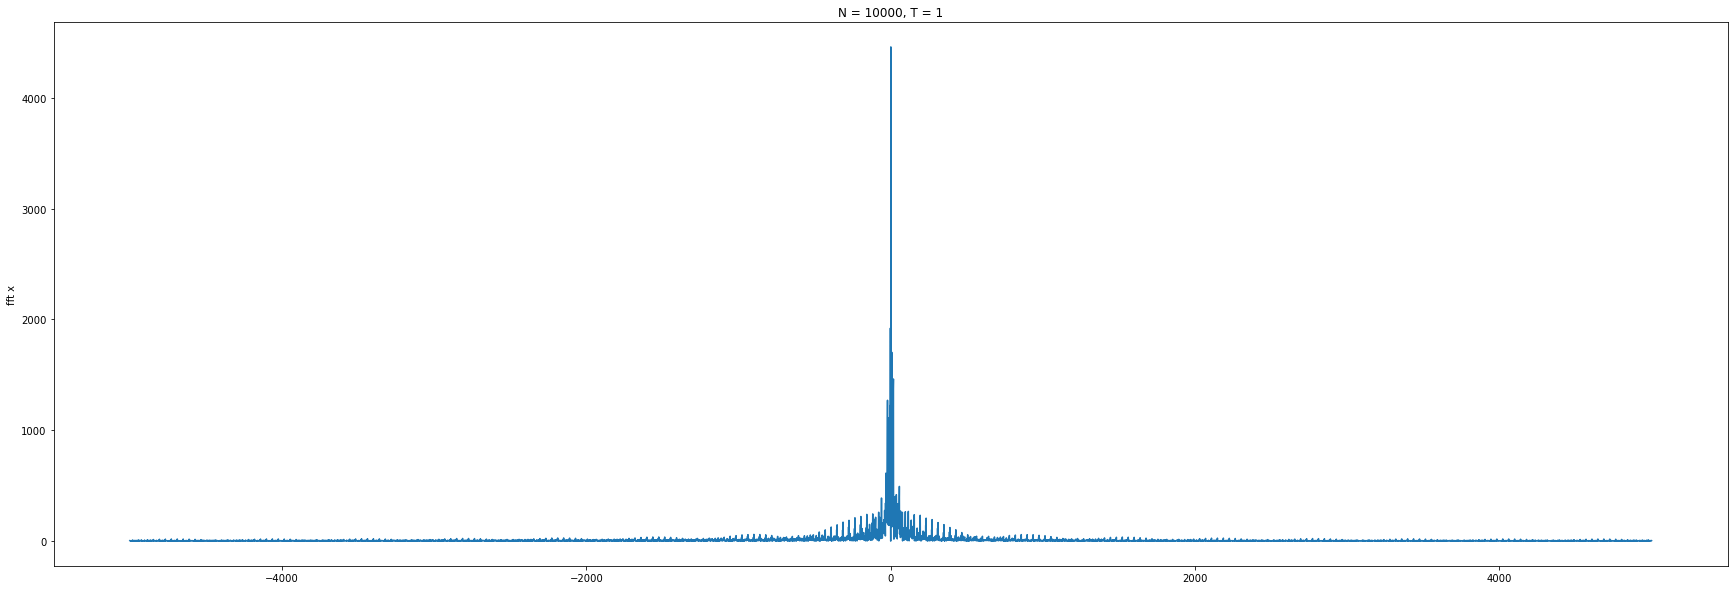

In [54]:
list = [(500, 0.25), (500, 0.5), (500, 1), (1000, 0.25), (1000, 0.5), (1000, 1), (2000, 0.25), (2000, 0.5), (2000, 1),
        (4000, 0.25), (4000, 0.5), (4000, 1), (10000, 0.25), (10000, 0.5), (10000, 1)]
for N, T in list:
    n = np.linspace(-N/2, N/2, N, dtype=int)
    x = np.cos(np.pi * n * T)
    fourier_x = fft(x)
    plot('','fft x', f'N = {N}, T = {T}', n, np.abs(fourier_x))

<font face="Times" size=5>
Question3
</font>

<div style="direction:rtl">
برای این سوال در اولین قدم تمامی داده‌های مورد نیاز را می‌خوانیم
</div>

In [55]:
SignalRate_clean1, clean1 = wavfile.read("/Users/mac/Desktop/Signal_System-practical/clean1.wav") 
SignalRate_distort1, distort1 = wavfile.read("/Users/mac/Desktop/Signal_System-practical/distorted1.wav") 
SignalRate_distort2, distort2 = wavfile.read("/Users/mac/Desktop/Signal_System-practical/distorted2.wav") 

<div style="direction:rtl">
حال برای شهود بهتر نمودار فرکانسی و نمودار زمانی هر یک از داده‌های داده شده را رسم می‌کنیم,
<br/>
    ابتدا برای نمودار فرکانسی سه داده‌ی مورد نظر داریم:
</div>

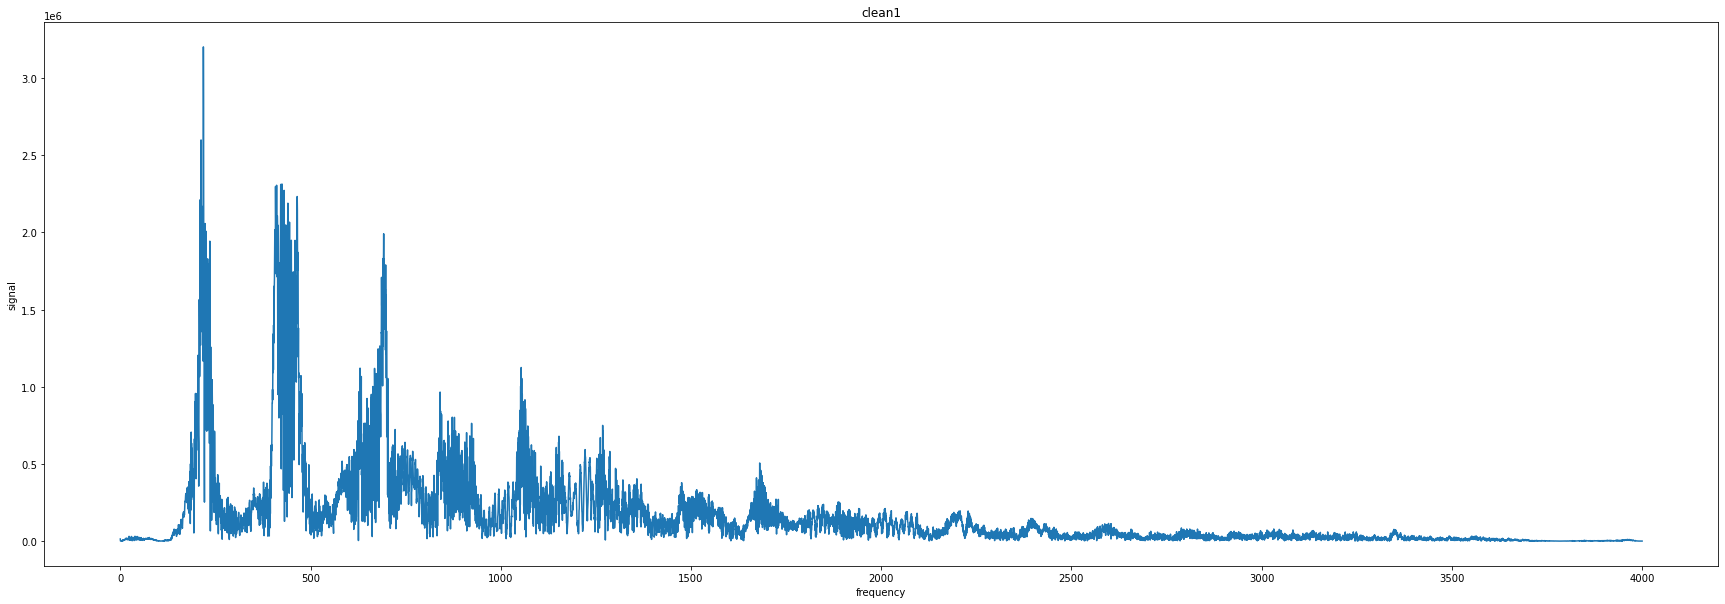

In [56]:
fft_spectrum = (np.abs(np.fft.rfft(clean1[:])))
lenght = len(fft_spectrum)
f_clean1 = (SignalRate_clean1/2) * np.linspace(0,1,lenght)
fft_spectrum = fft_spectrum[:np.size(f_clean1)]
plot('frequency', 'signal', 'clean1', f_clean1, np.abs(fft_spectrum))

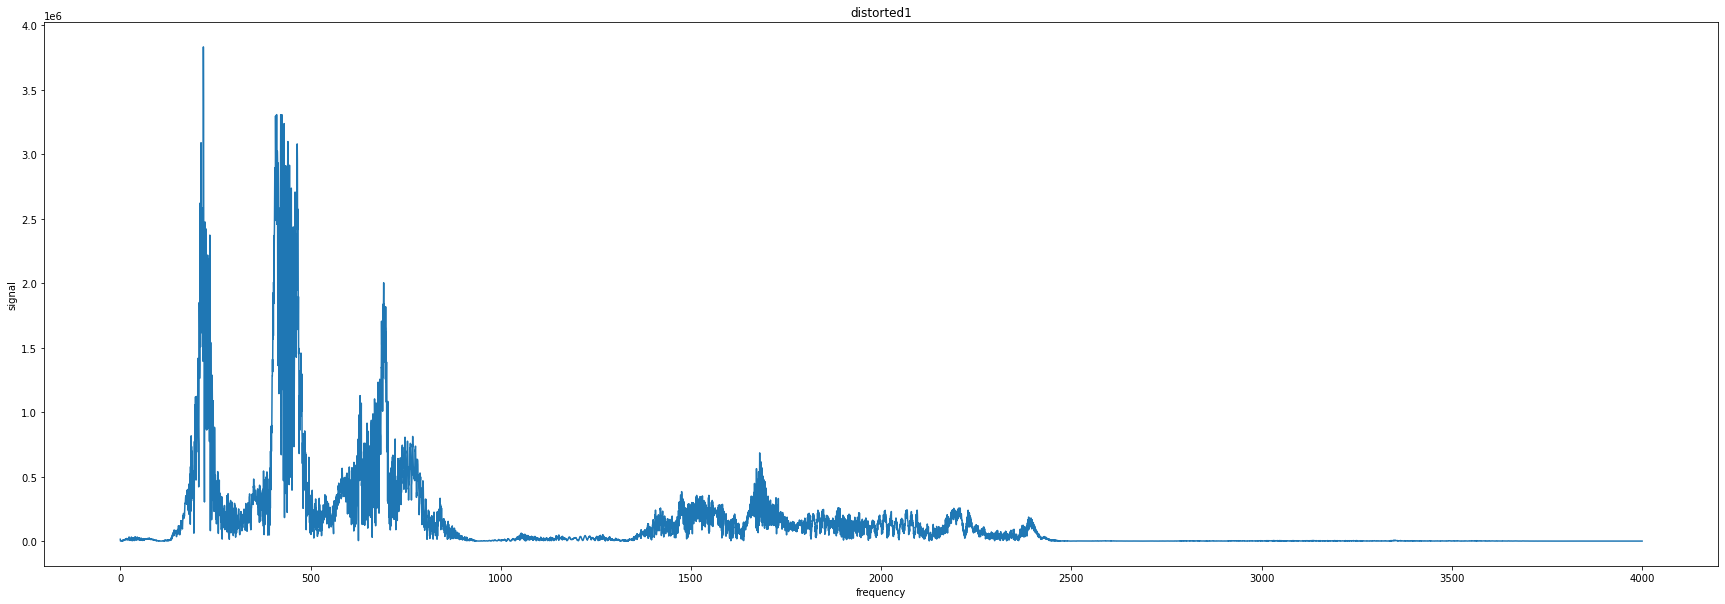

In [57]:
fft_spectrum1 = (np.abs(np.fft.rfft(distort1[:])))
lenght = len(fft_spectrum1)
f_distort1 = (SignalRate_distort1/2) * np.linspace(0,1,lenght)
fft_spectrum1 = fft_spectrum1[:np.size(f_distort1)]
plot('frequency', 'signal', 'distorted1', f_distort1, np.abs(fft_spectrum1))

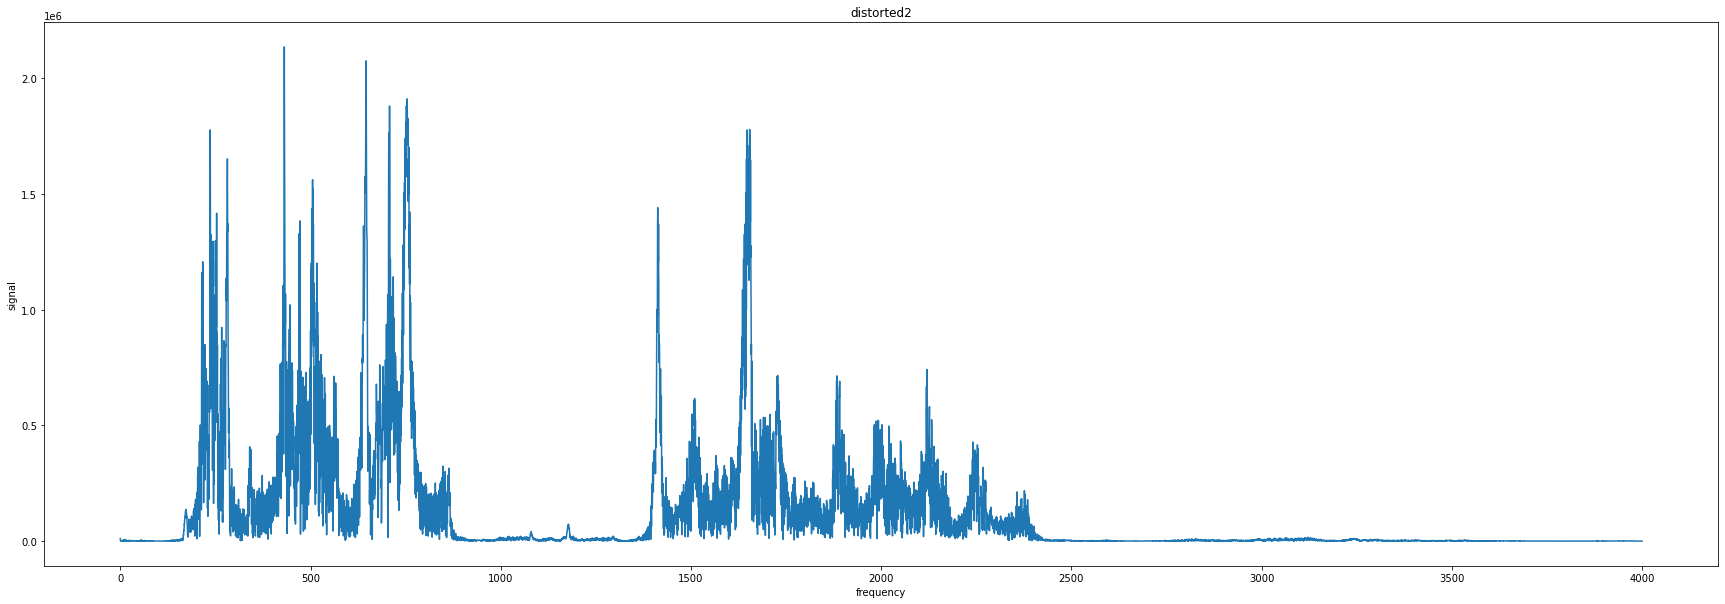

In [58]:
fft_spectrum2 = (np.abs(np.fft.rfft(distort2[:])))
lenght = len(fft_spectrum2)
f_distort2 = (SignalRate_distort2/2) * np.linspace(0,1,lenght)
fft_spectrum2 = fft_spectrum2[:np.size(f_distort2)]
plot('frequency', 'signal', 'distorted2', f_distort2, np.abs(fft_spectrum2))

<div style="direction:rtl">
مشاهده می‌کنیم که فرکانس های حدود  ۷۵۰ تا ۱۳۰۰ هرتز به شدت تضعیف شده‌اند. برای معکوس کردن این تضعیف تابع انتقال سیستم را محاسبه کرده و تبدیل فوریه distorted2 را بر آن تقسیم می‌کنیم
</div>

$$H(j\omega) = \frac{Y_1 (j \omega)}{X_1 (j \omega)}$$
</br>
$$X_2 = \frac{Y_2 (j\omega)}{H(j\omega)}$$

<div style="direction:rtl">
    تنها نکته‌ای که وجود دارد این است که در تقسیم پایتون، بعضی از درایه‌ها که نزدیک به صفر هستند باعث تولید اعداد خیلی بزرگ می‌شوند و نوعی صدای سوت ایجاد می‌شود. برای رفع این مشکل، باید
    $H$
    را با عدد ثابتی جمع کنیم (در تمامی نقاط) و سپس حاصل مذکور را در تقسیم استفاده کنیم.
<div>

<div style="direction:rtl">
برای نمودار زمانی ۳ داده‌ی مد نظر نیز داریم:
</div>

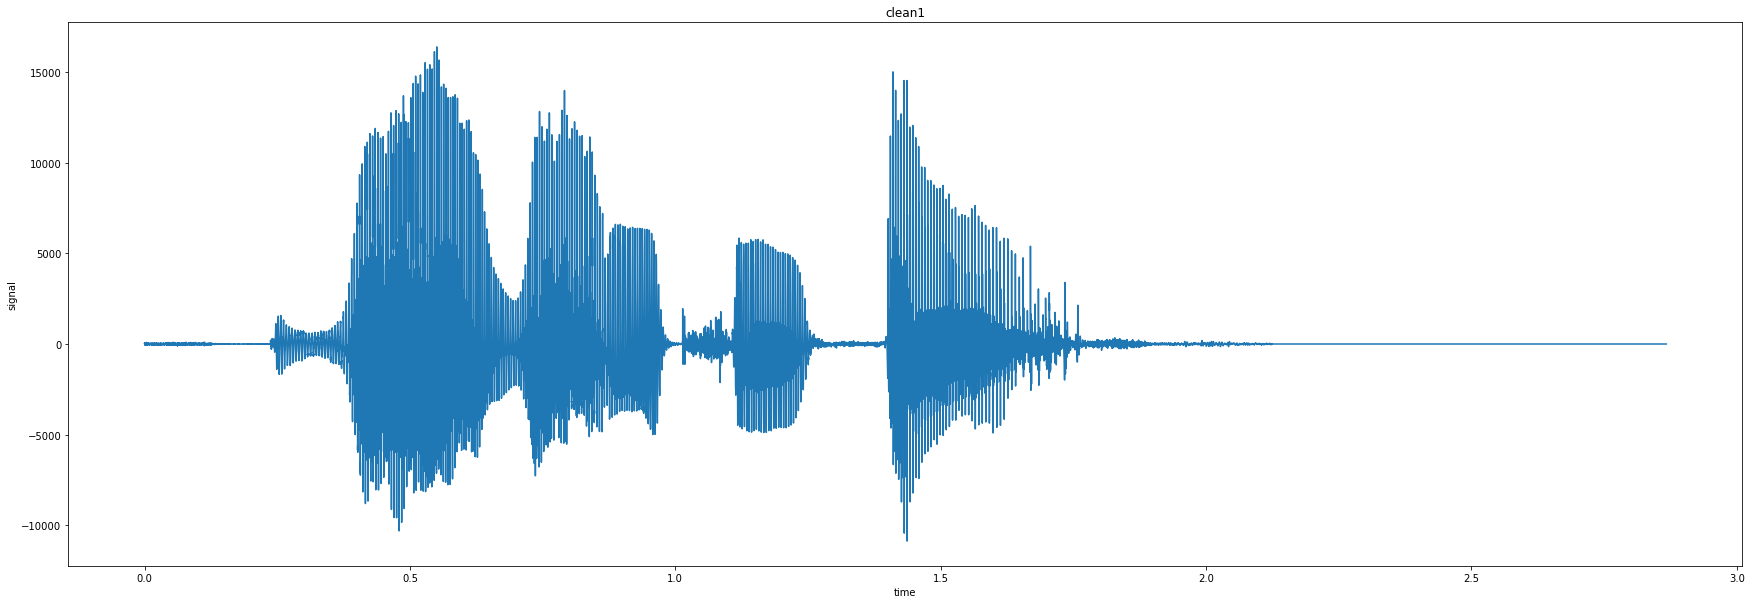

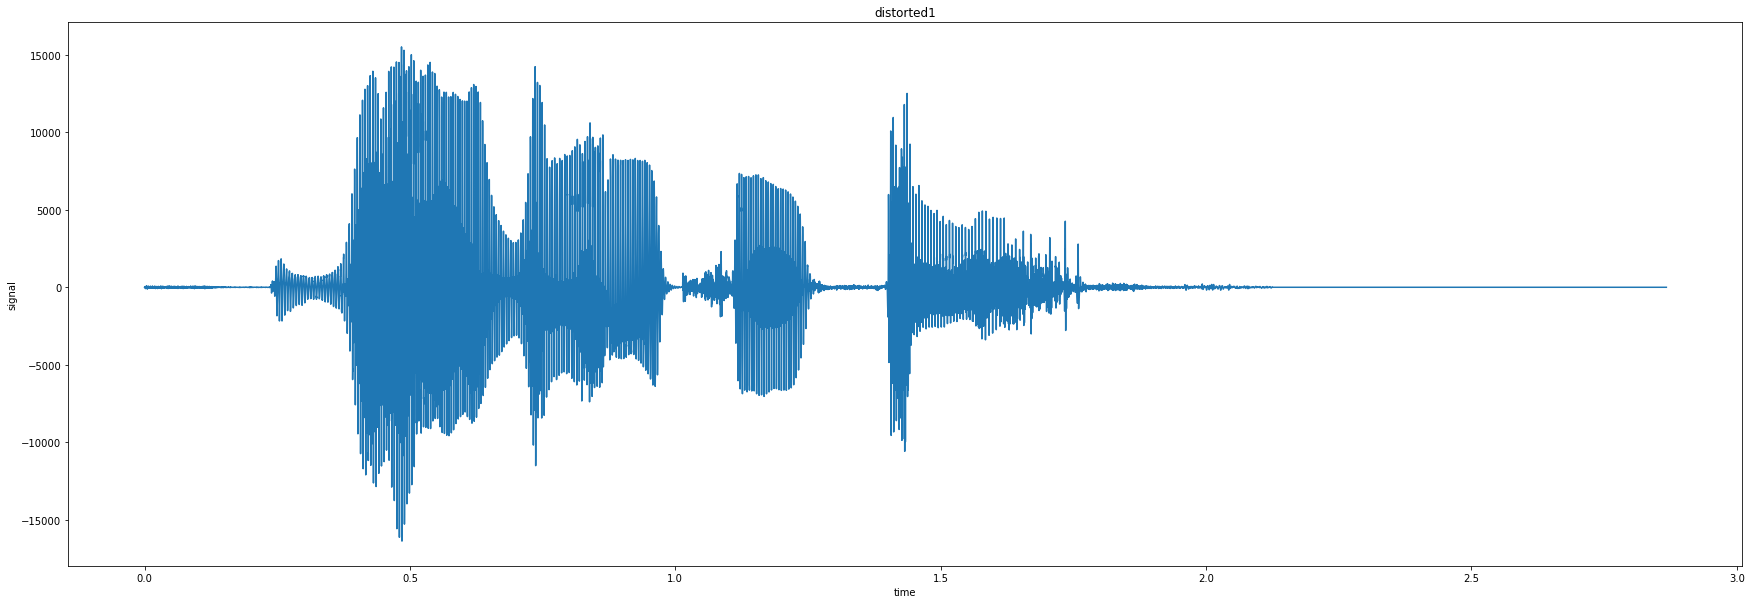

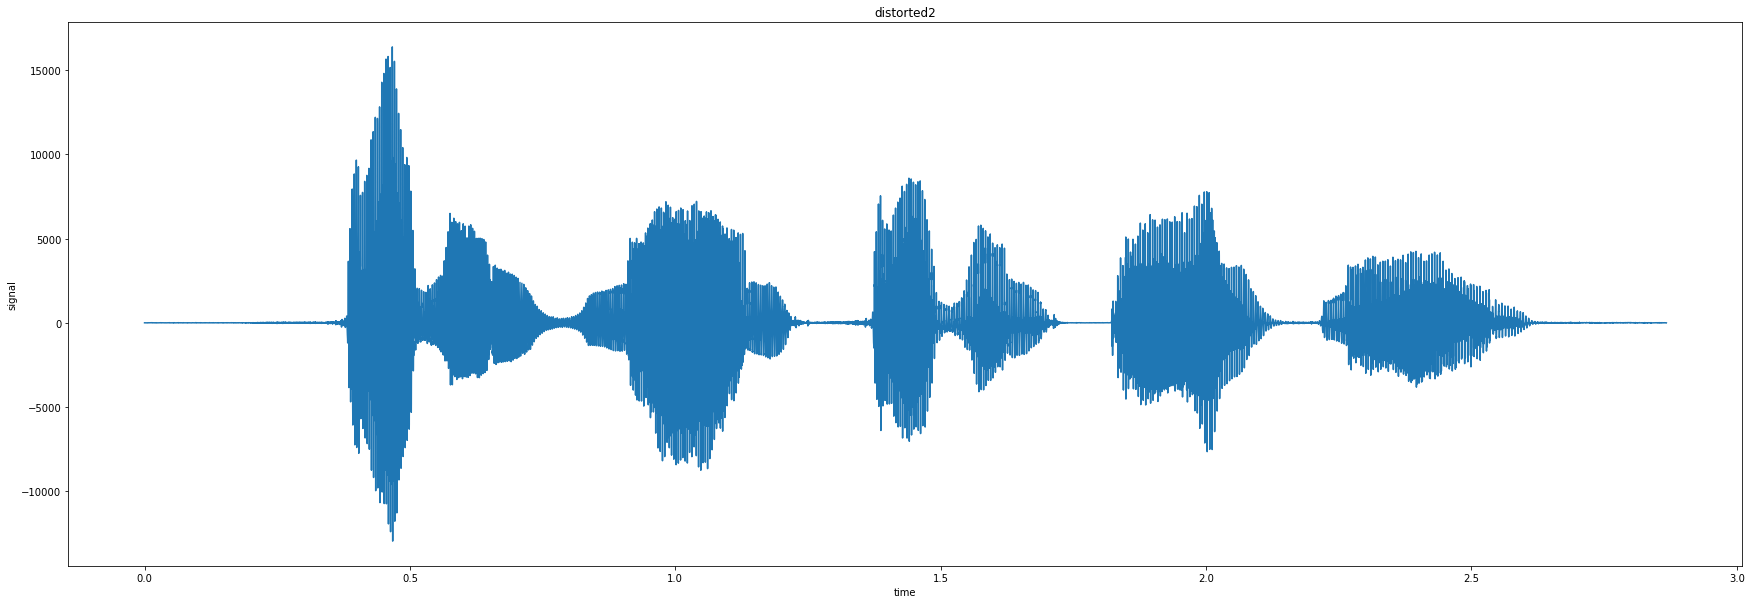

In [59]:
length_distort2 = distort2.shape[0]/SignalRate_distort2
extend_clean1 = np.append(clean1, np.zeros(distort2.shape[0]-clean1.shape[0]))
t_clean1 = np.linspace(0, length_distort2, extend_clean1.shape[0])
plot('time', 'signal', 'clean1', t_clean1, extend_clean1)
extend_distort1 = np.append(distort1, np.zeros(distort2.shape[0]-distort1.shape[0]))
t_distort1 = np.linspace(0, length_distort2, extend_distort1.shape[0])
plot('time', 'signal', 'distorted1', t_distort1, extend_distort1)
t_distort2 = np.linspace(0, length_distort2, distort2.shape[0])
plot('time', 'signal', 'distorted2', t_distort2, distort2)

<div style="direction:rtl">
در این قسمت نیز frequence response و معکوسش را برای سیستم، حساب کردیم
</div>

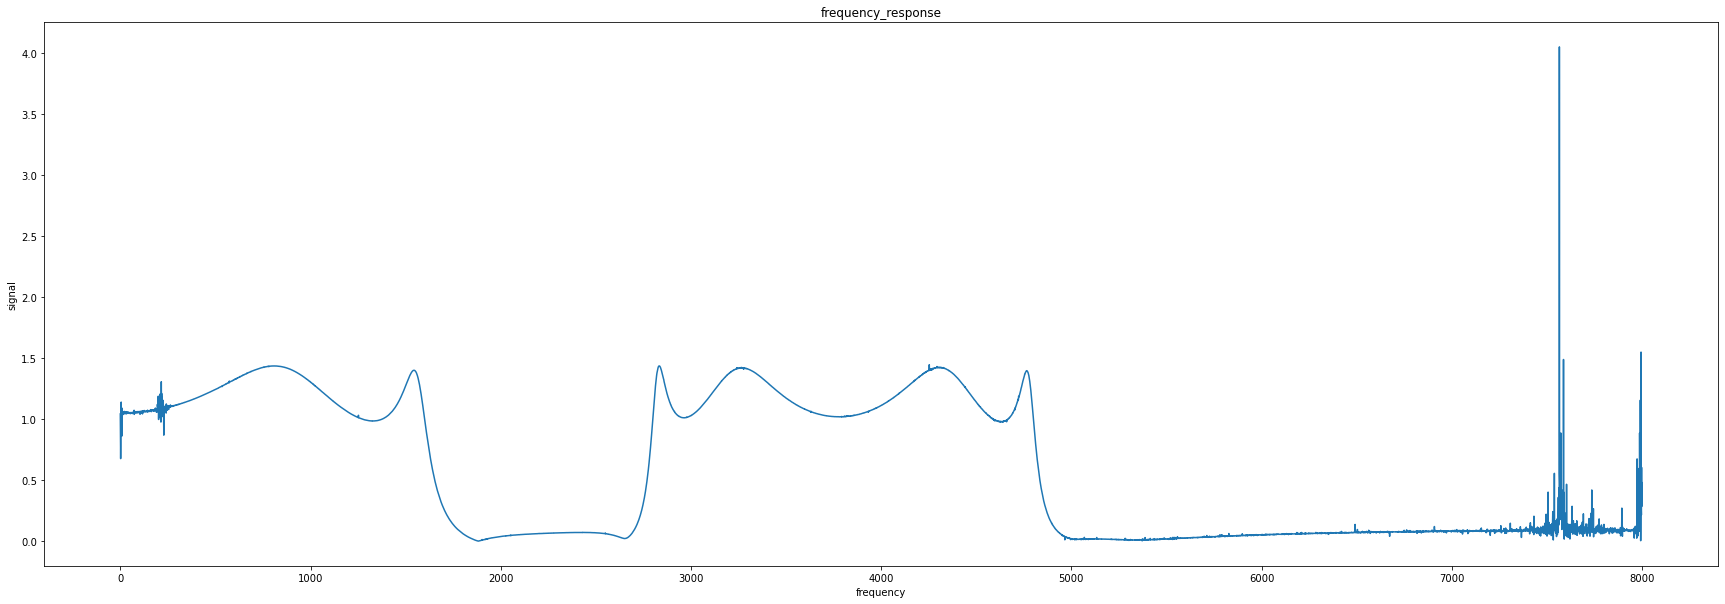

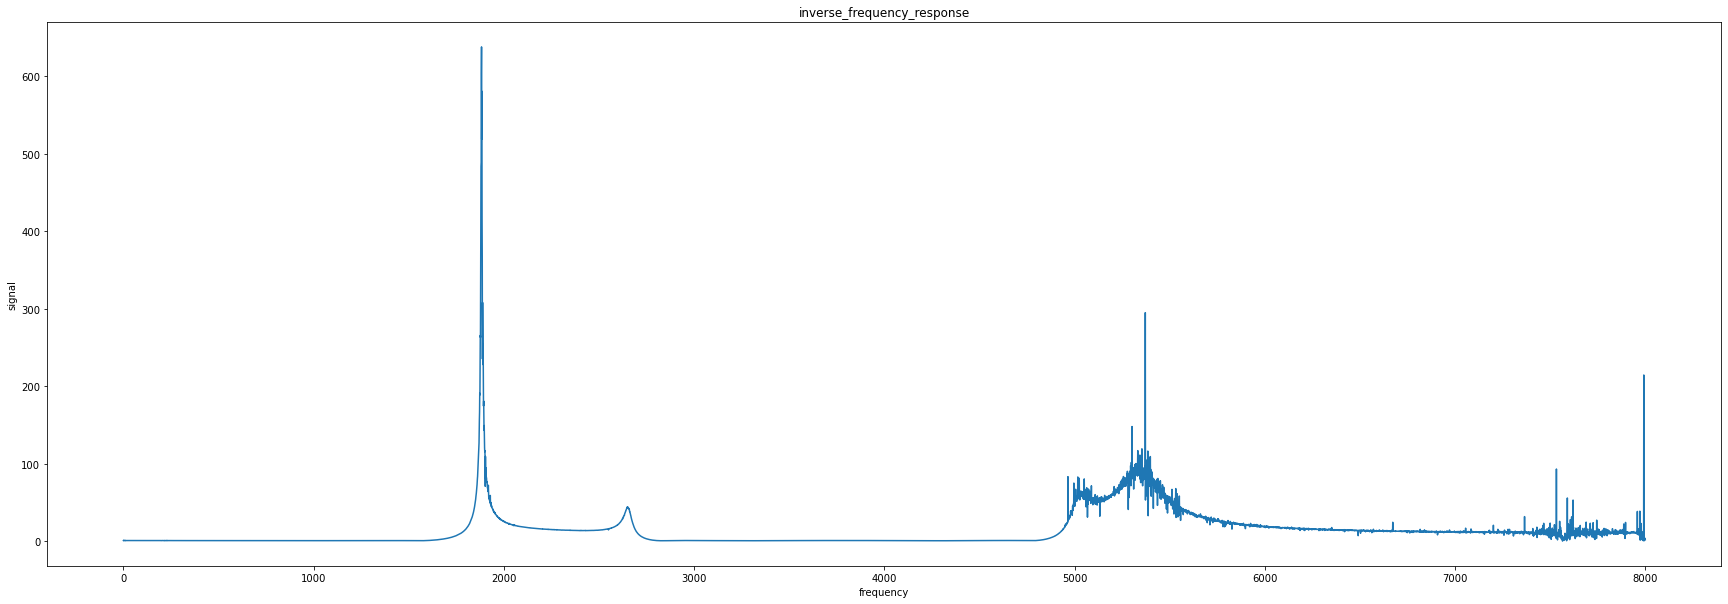

In [60]:
frequency_response = fft_spectrum1 / fft_spectrum
f = np.linspace(0, SignalRate_distort1, frequency_response.shape[0])
plot('frequency', 'signal', 'frequency_response', f, np.abs(frequency_response))
inverse_frequency_response = 1 / frequency_response
plot('frequency', 'signal', 'inverse_frequency_response', f, np.abs(inverse_frequency_response))

In [61]:
H = (np.fft.rfft(distort1[:]))/(np.fft.rfft(clean1[:]))
H = resample(H , round(len(distort2)/2)+1)
print(min(abs(H)) , max(abs(H)))

0.0013130660750473207 3.696374205602248


<div style="direction:rtl">
    با توجه به مقادیر حداقل و حداکثر، چند عدد مختلف را برای جمع شدن با H تست کردم و عدد ۰.۰۲۵ نتیجه خوبی داد و برای همین از آن استفاده کردم. هرچند همچنان سوت اندکی وجود دارد، ولی کیفیت اصلی صدا بهتر شده است. در حالت قبلی انگار کمی صدا «گرفته» بود ولی بعد از این تبدیل مشکل برطرف شده است.
</div>

In [62]:
clean2 = np.fft.rfft(distort2)/(H+0.025)
out = np.fft.irfft(clean2)

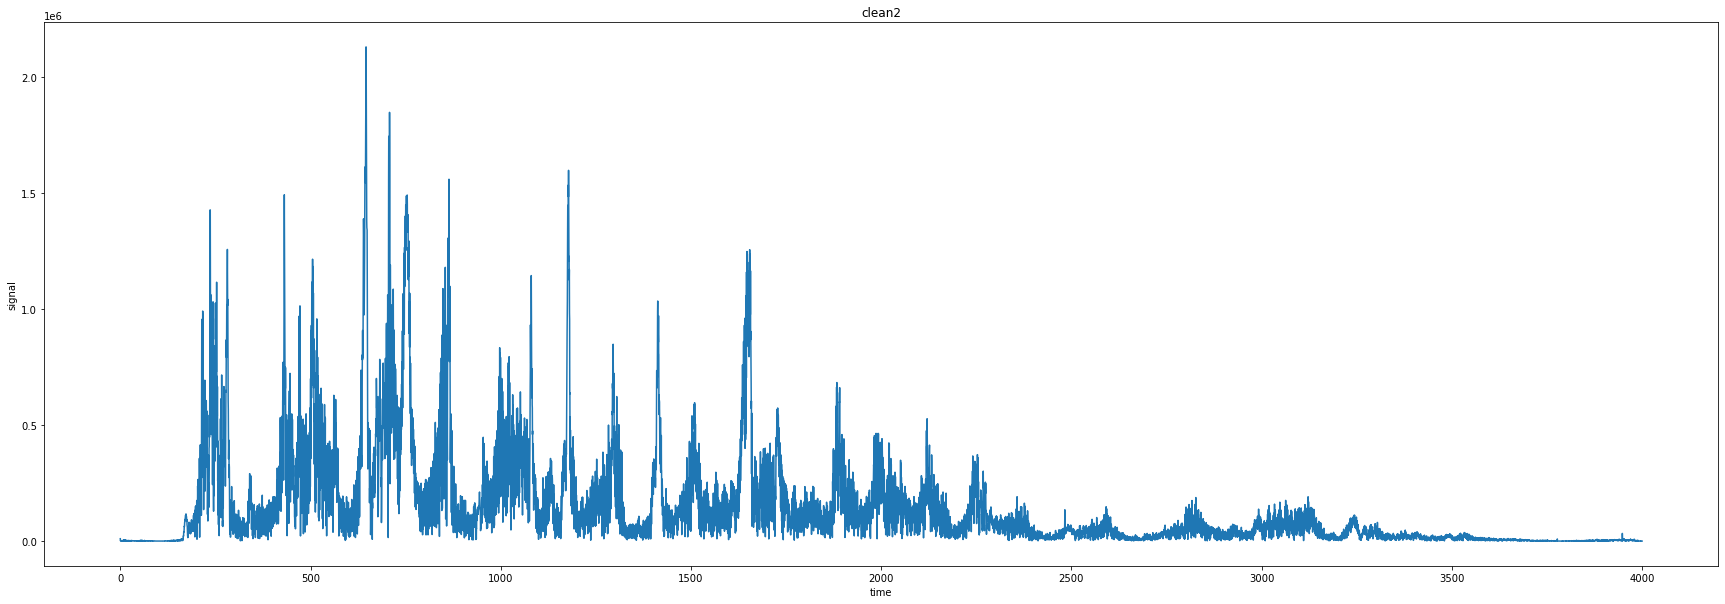

In [63]:
fft_spectrum2 = (np.abs(np.fft.rfft(out[:])))
lenght = len(fft_spectrum2)
f_distort1 = (SignalRate_distort2/2) * np.linspace(0,1,lenght)
fft_spectrum2 = fft_spectrum2[:np.size(f_distort1)]
wavfile.write("/Users/mac/Desktop/Signal_System-practical/recovered2.wav",8000,out.astype(np.int16))
plot('time', 'signal', 'clean2', f_distort1, fft_spectrum2)

<div style="direction:rtl">
مشاهده می‌کنیم که کیفیت صدا بهتر شده است. با توجه به نمودار فرکانسی رسم شده هم می‌بینیم که فرکانس‌هایی که به شدت تضعیف شده بودند تقویت شده و اثر سیستم تا حد خوبی خنثی شده است.
<br/>
همچنین صدای بهبود یافته در فایل recovered2.wav نوشته می‌شود.
</div>

<font face="Times" size=5>
Question4
</font>

<div style="direction:rtl">
برای این سوال بعد از خواندن داده‌ی  noisy.wav،  نمودار طیف فرکانسی آن را رسم می‌کنیم تا ببینیم که چه فرکانس‌های دامنه بالایی دارند. از آن‌ جایی که نویز احتمالا به صورت تصادفی (مثلا نویز سفید گاوسی) ممکن است باشد، در همه فرکانس‌ها اثر یکسانی خواهد گذاشت. در نتیجه باید فرکانس‌های اصلی که بیش‌ترین دامنه را دارند بدست بیاوریم. این فرکانس‌ها مربوط به سیگنال اصلی هستند. بقیه را با فیلتر حذف می‌کنیم.
</div>

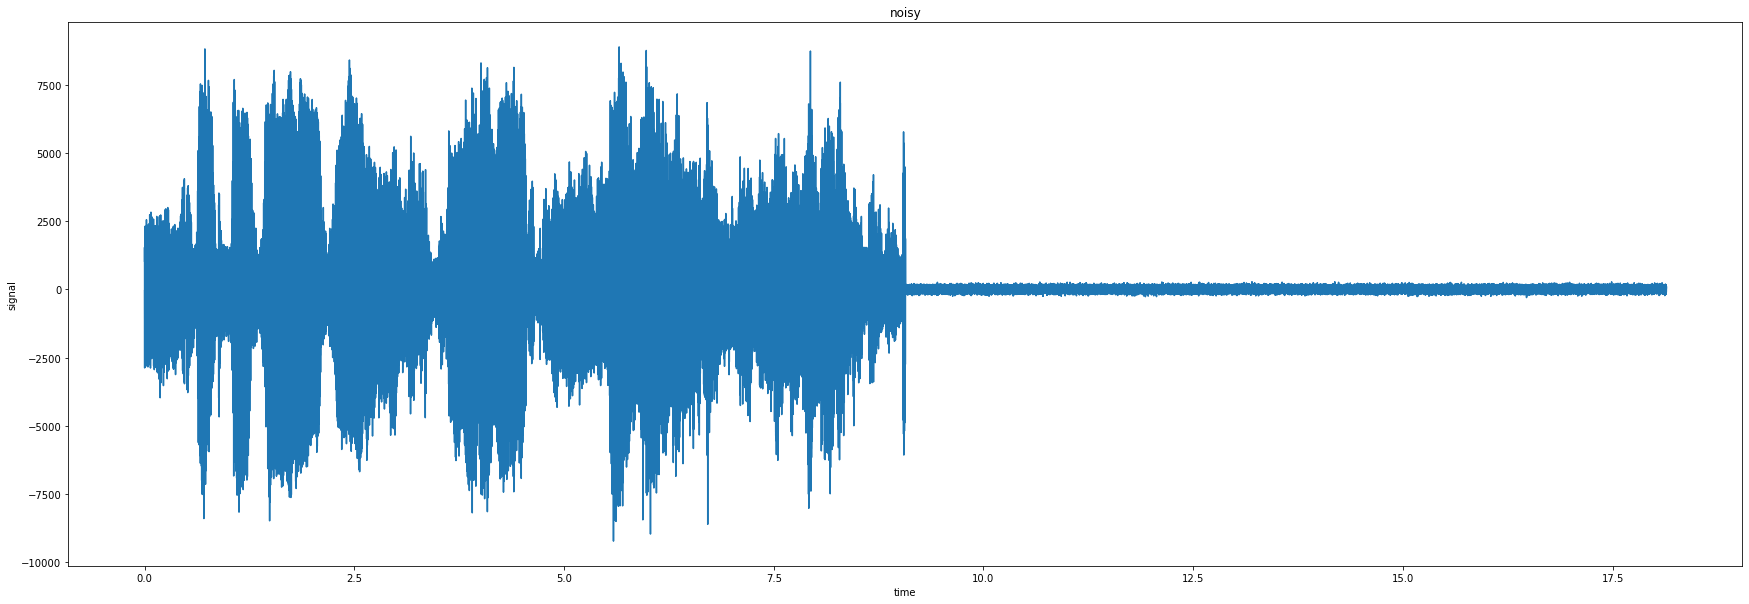

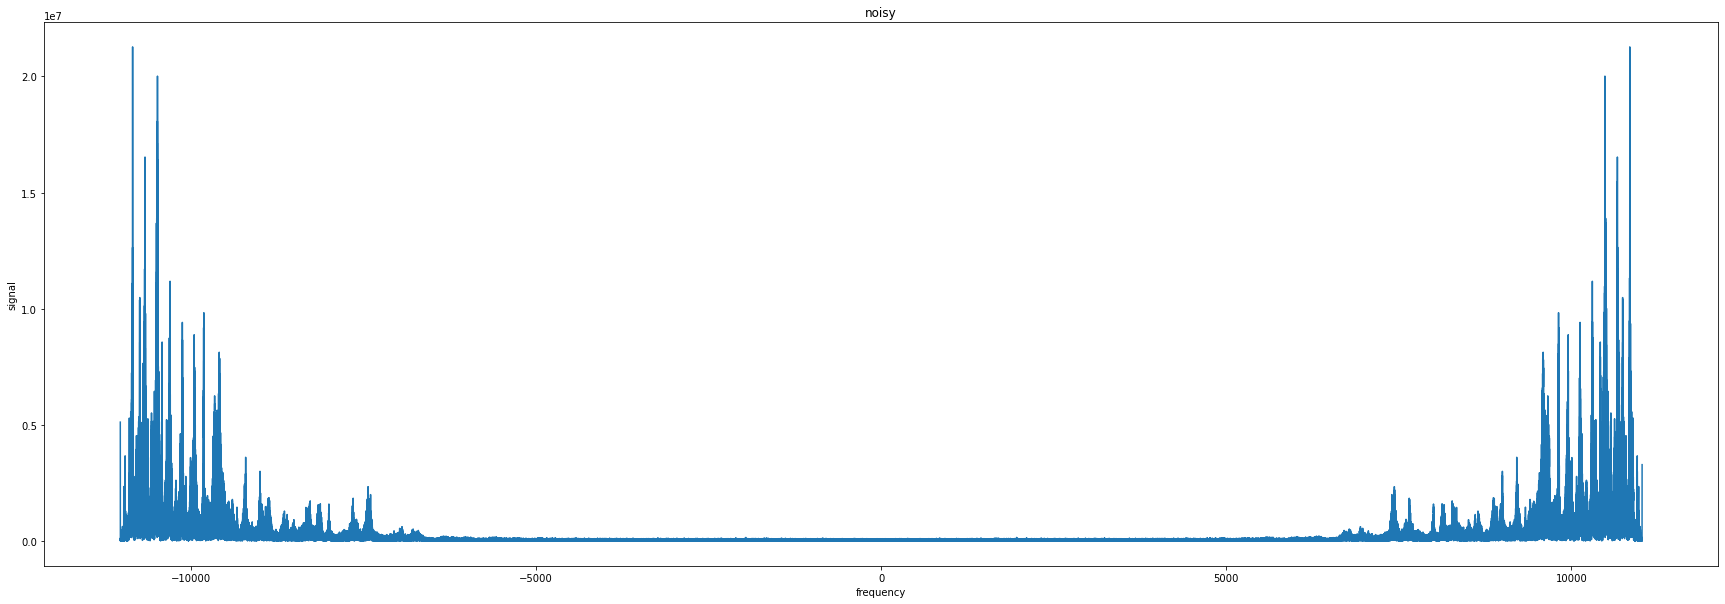

In [64]:
SignalRate_noisy, noisy_data = wavfile.read('/Users/mac/Desktop/Signal_System-practical/noisy1.wav')
length_noisy = noisy_data.shape[0]/SignalRate_noisy
t_noisy = np.linspace(0, length_noisy, noisy_data.shape[0])
plot('time', 'signal', 'noisy', t_noisy, noisy_data)
noisy_DFT = np.fft.fft(noisy_data)
f_noisy = np.linspace(-SignalRate_noisy/2, SignalRate_noisy/2, noisy_DFT.shape[0])
plot('frequency', 'signal', 'noisy', f_noisy, np.abs(noisy_DFT))

<div style="direction:rtl">
    فیلتر bandpass برای بازه فرکانسی بین ۱۳۰ تا ۱۵۰۰ هرتز را طراحی می‌کنیم.

    
    برای طراحی از فیلتر butterworth استفاده می‌کنیم. بعد از چند بار تست، درجه ۴ و درجه ۵ خروجی خوبی دادند. همچنین  خود کتابخانه scipy پیشنهاد داده است که نوع خروجی در حالت sos به معنی second-order sections باشد که عملا فیلتر مرتبه بالاتر را از کنار هم قرار دادن اجزای مرتبه دو ایجاد می‌کند. سپس با کمک تابع sosfilt این فیلتر را روی داده اعمال می‌کنیم.

    همچنین باید توجه کرد که واحد فرکانس بحرانی‌ای که scipy می‌گیرد برحسب فرکانس نمونه‌برداری است. به نوعی هر واحد که به آن داده می شود معادل ۲ نیم سیکل در هر نمونه است. در نتیجه در ابتدا مقادیر فرکانسی گفته شده در ۲ (به خاطر رابطه نایکوئیست) ضرب شده و سپس بر نرخ نمونه برداری تقسیم می‌شوند و سپس به تابع مورد نظر داده می‌شوند.
<div> 

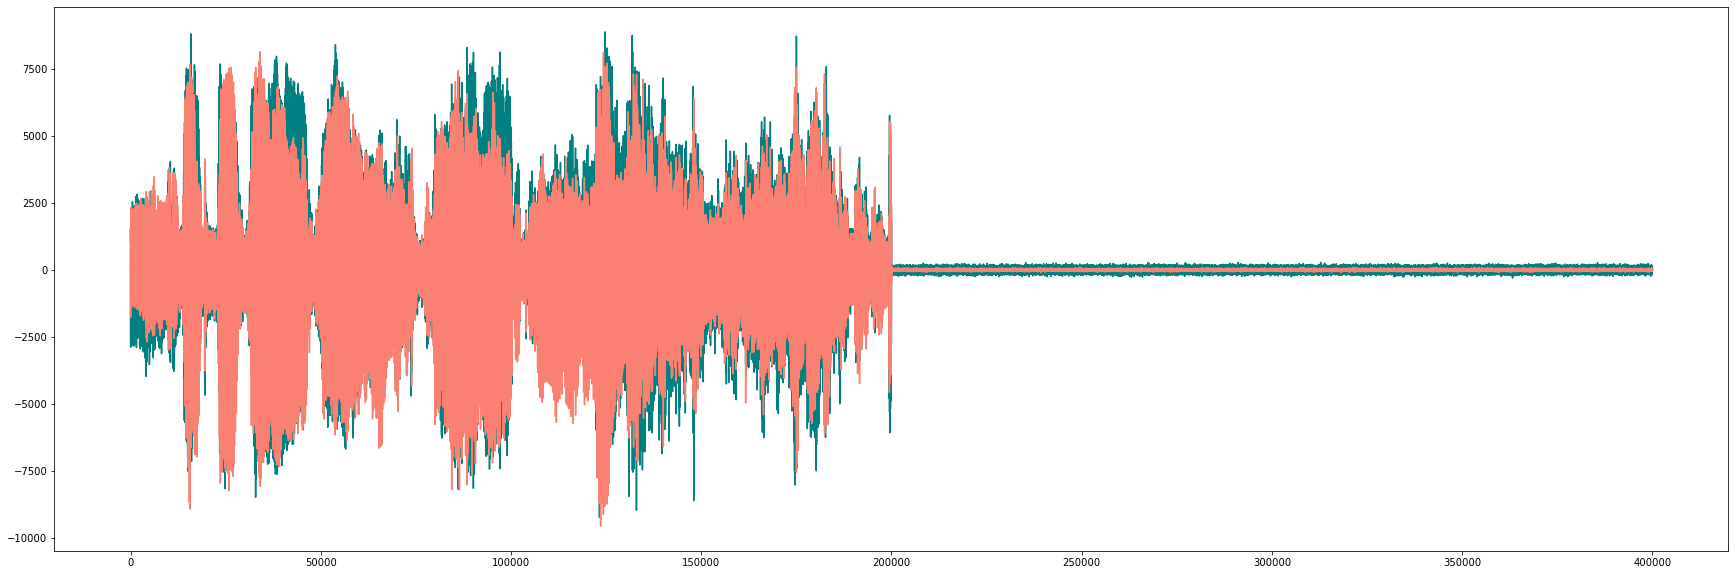

In [65]:
wc = np.array([130,1500])*2/SignalRate_noisy
sos = butter(5,wc,btype='bandpass',output = "sos")
filtered = sosfilt(sos,noisy_data)
plt.figure(figsize = (30, 10))
plt.plot(noisy_data, color = 'teal') # رنگ آبی مایل به سبز پس زمینه نمودار فرکانس نویز است
plt.plot(filtered, color = 'salmon') # رنگ نارنجی روشن رویی نمودار فرکانس فیلتر شده است

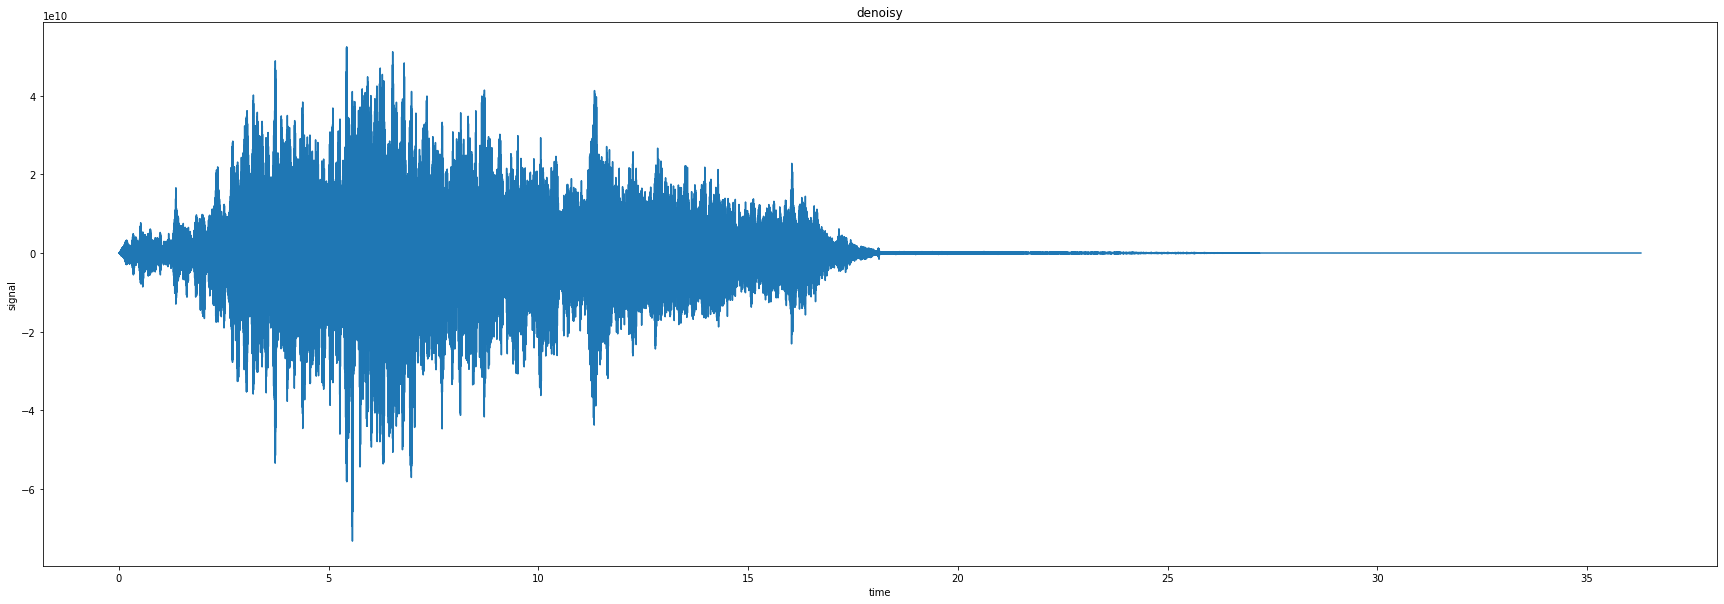

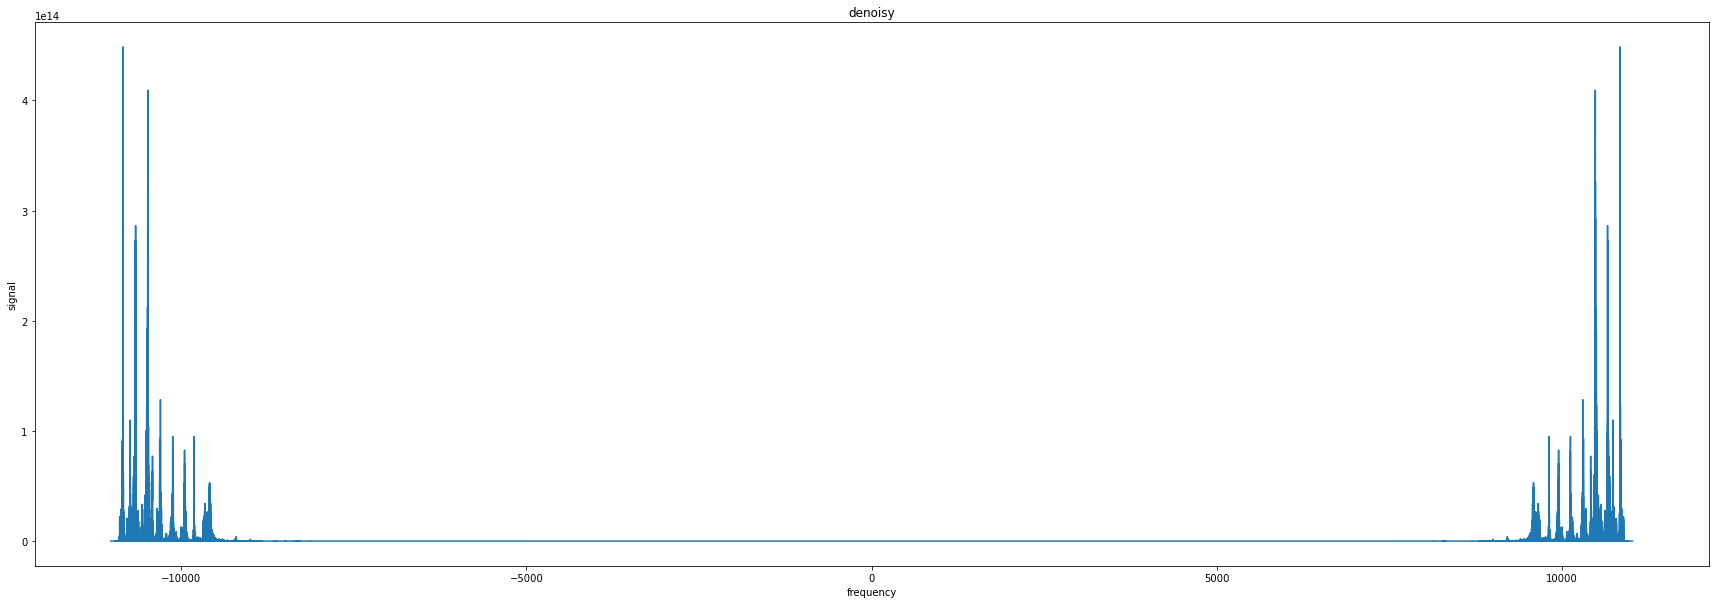

In [66]:
denoisy = np.convolve(filtered, noisy_data)
length_denoisy = denoisy.shape[0]/SignalRate_noisy
t_denoisy = np.linspace(0, length_denoisy, denoisy.shape[0])
plot('time', 'signal', 'denoisy', t_denoisy, denoisy)
denoisy_DFT = np.fft.fft(denoisy)
f_denoisy = np.linspace(-SignalRate_noisy/2, SignalRate_noisy/2, denoisy_DFT.shape[0])
plot('frequency', 'signal', 'denoisy', f_denoisy, np.abs(denoisy_DFT))

In [67]:
wavfile.write("/Users/mac/Desktop/Signal_System-practical/denoise1.wav" , SignalRate_noisy,filtered.astype(np.int16))

<div style="direction:rtl">
  همان طور که مشاهده می‌کنیم فیلتر به خوبی کار کرده و فرکانس‌های بعد و قبل از مقادیر تعیین شده صفر شده‌اند. البته اندکی از فرکانس‌های بعدی هم باقی مانده که با بالابردن درجه فیلتر می‌توان آنان را حذف کرد ولی این کار را نکردیم چون بخش اندکی از صدای اصلی هم در این فرکانس‌ها موجود است و برای همین نمی‌خواستیم که به طور کامل صفر بشوند. در این مورد عملا یک تریدآف بین این که چه قدر نویز را از بین ببریم و چه قدر صداهای مفید بازه‌های انتهایی فرکانس را از بین ببریم, داریم.
</div>

<font face="Times" size=5>
Question5
</font>

<div style="direction:rtl">
در اولین قدم پکیج‌های مورد نظر را نصب کردیم:
</div>

In [68]:
!pip install slycot
!pip install control
import control

  Using cached slycot-0.5.4.tar.gz (3.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for slycot (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [100 lines of output]
      
      
      --------------------------------------------------------------------------------
      -- Trying 'Ninja' generator
      --------------------------------
      ---------------------------
      ----------------------
      -----------------
      ------------
      -------
      --
      CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
        Compatibility with CMake < 3.5 will be removed from a future version of
        CMake.
      
        Update the VERSION argument <min> value or use a ...<max> suffix to tell
        CMake that the project does not need compatibility with older versions.
      
      Not s

<div style="direction:rtl">
در ادامه کتابخانه‌های مورد نظر را اضافه کردیم
</div>

In [69]:
def plot1(xlabel: str, ylabel: str, title: str, x, y, ylimit):
    plt.figure(figsize=(30, 10))
    plt.semilogx(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(ylimit)
    plt.show()

<div style="direction:rtl">
در این قسمت دوباره $ H(jw) $ را نوشتیم تا در ادامه از این معادله استفاده کنیم
</div>

$$
H(jw) = \frac{(jw)^{2}+2jw+10}{(jw)^{3}+25jw+1.9 * 10^{6}jw + 10}
$$

<div style="direction:rtl">
برای پاسخ فرکانسی زیر نمودار bode بدون استفاده از پکیج کنترل داریم:
</div>

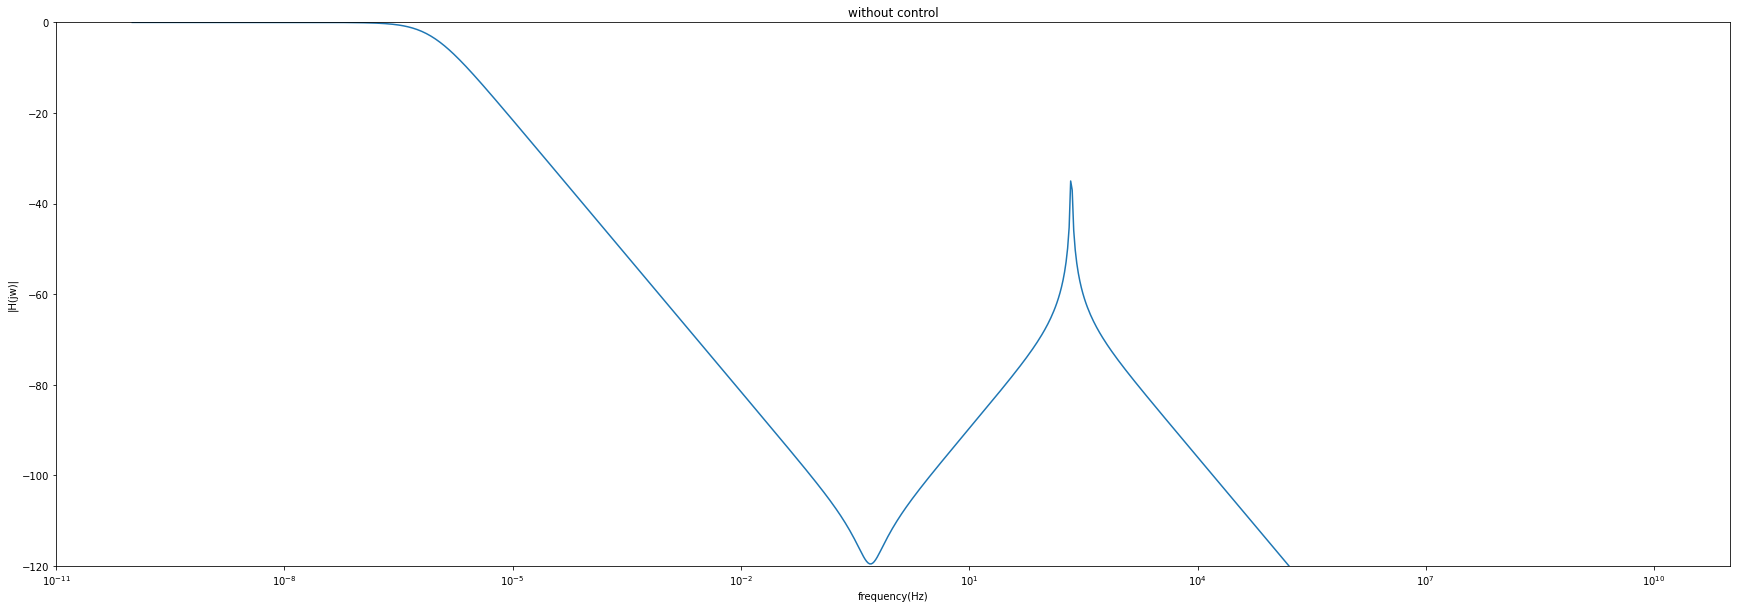

In [70]:
freq = np.logspace(-10, 10, 1000)
w = 2 * np.pi * freq
t = 1.0j * w
Hjw = (t**2 + 2*t + 10) / (t**3 + 25*t + 1.9 * (10**6)*t + 10)
log_magnitude = 20 * np.log10(np.abs(Hjw))
phase = 120 / np.pi * np.arctan2(np.imag(Hjw), np.real(Hjw))
plot1('frequency(Hz)', '|H(jw)|', 'without control', freq, log_magnitude, [-120, 0])

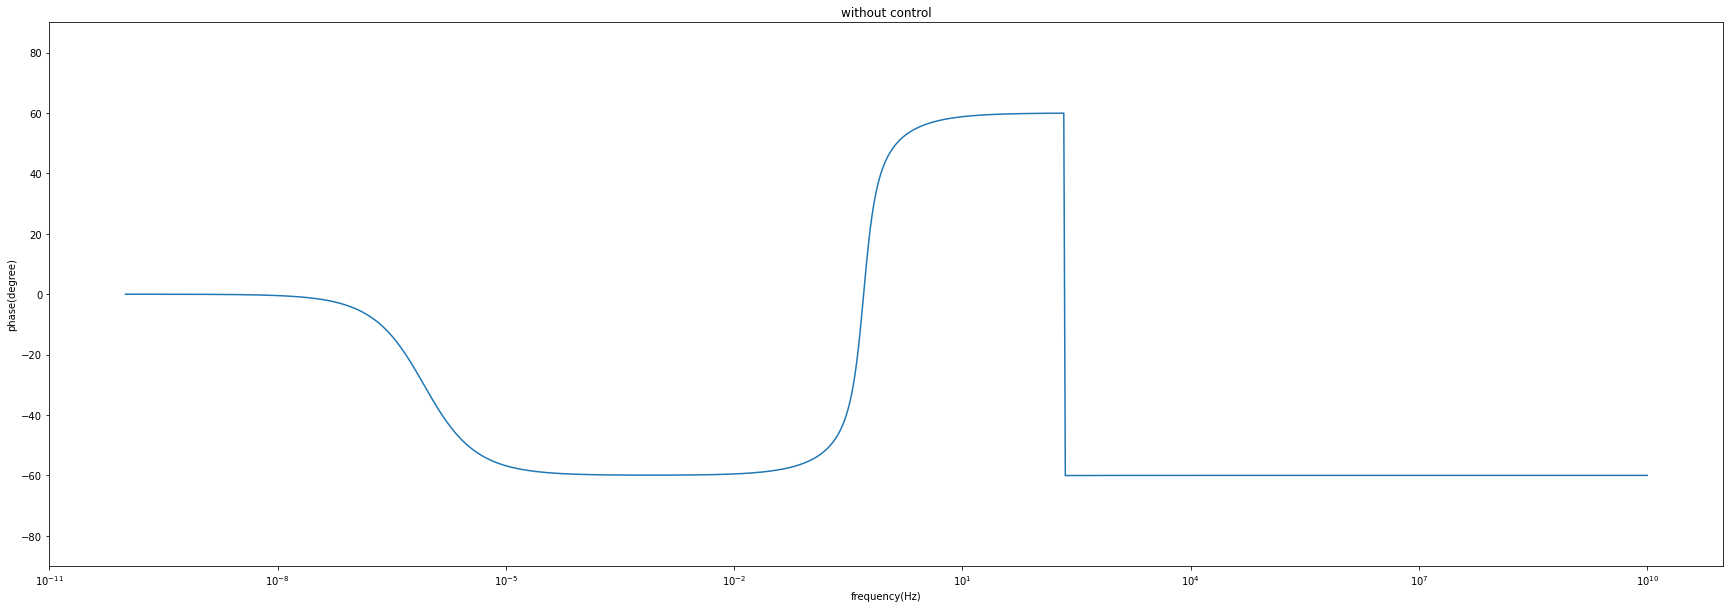

In [71]:
plot1('frequency(Hz)', 'phase(degree)', 'without control', freq, phase, [-90, 90])

<div style="direction:rtl">
برای پاسخ فرکانسی زیر نمودار bode با استفاده از پکیج کنترل داریم:
</div>

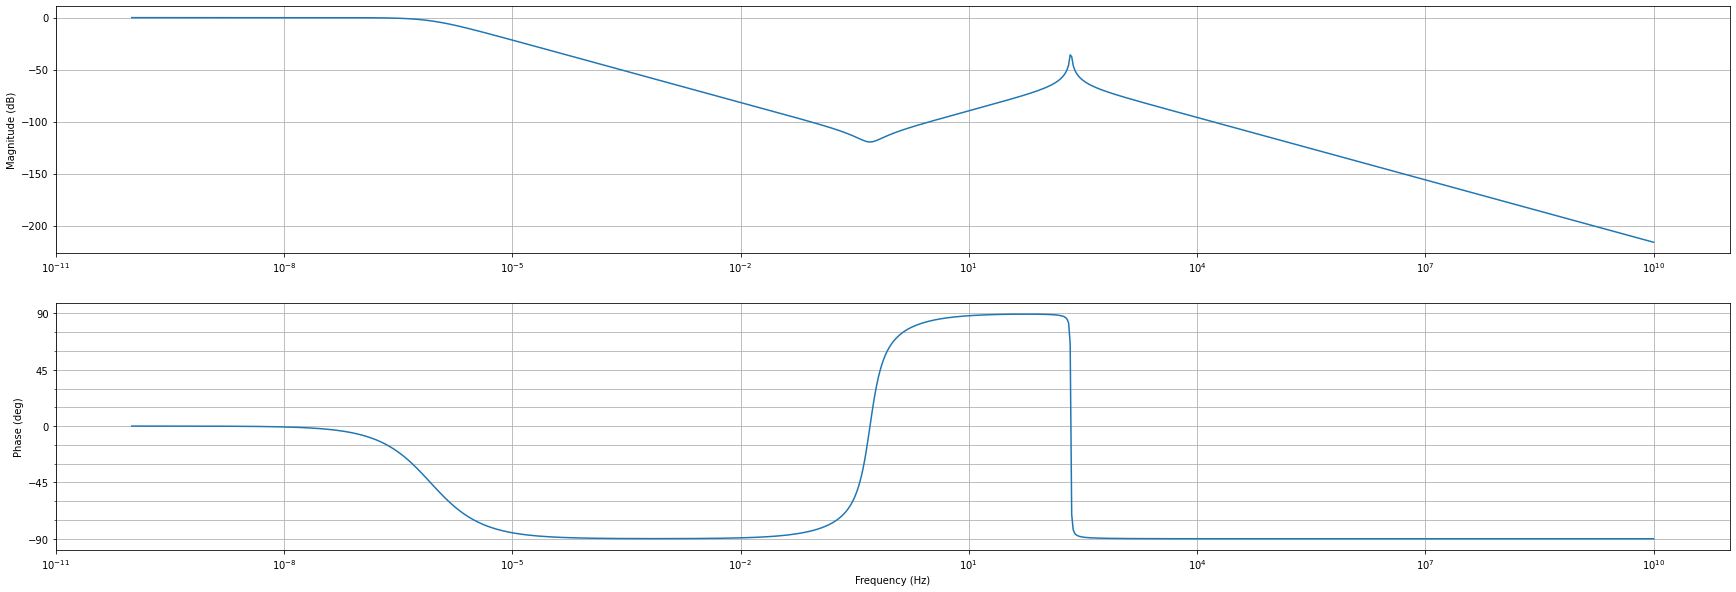

In [72]:
plt.figure(figsize=(30, 10))
Hjw = control.TransferFunction([1.0, 2.0, 10.0], [1.0, 25.0, 1.9*(10.0**6), 10.0])
diagram = control.bode_plot(Hjw, w, dB=1, Hz=1, deg=1)

<div style="direction:rtl">
برای محاسبه‌ی قطب‌ها با استفاده از پکیج کنترل داریم:
</div>

In [73]:
poles = Hjw.pole()
for pole in poles:
    print(f'pole: {pole:.4f}')

pole: -12.5000+1378.3482j
pole: -12.5000-1378.3482j
pole: -0.0000+0.0000j


<div style="direction:rtl">
برای محاسبه‌ی صفرها با استفاده از پکیج کنترل داریم:
</div>

In [74]:
zeros = Hjw.zero()
for zero in zeros:
    print(f'zero: {zero:.4f}')

zero: -1.0000+3.0000j
zero: -1.0000-3.0000j
